<a href="https://colab.research.google.com/github/emanuel379/Series-Temporais-e-Aprendizado-Dinamico/blob/main/Trabalho_de_S%C3%A9ries_Temporais_An%C3%A1lise_Estat%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ada Maris Pereira Mario

Amanda Caroline de Oliveira Pires

Angelo Antonio Bertoli Guido

Eduarda Fritzen Neumann

Emanuel Victor da Silva Favorato

Gabriela Scaranello Teixeira de Barros

Ivan Barbosa Pinheiro

Mariana Kaori Randig Ekuni

Romulo Ferreira da Silva

Rui Emanuel Lima Vieira

Tayane Leandro Guerrero

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import plotly.express as px

# Análise descritiva dos dados

# **AIDS**

In [ ]:
with open('aids.csv', 'r') as file:
    lines = file.readlines()

cleaned_lines = []
for line in lines:
    if line.count('"') % 2 != 0:  # Check for unclosed quotes
        line = line.rstrip() + '"'  # Add closing quote
    cleaned_lines.append(line)

with open('cleaned_aids.csv', 'w') as file:
    file.writelines(cleaned_lines)

df_aids = pd.read_csv('cleaned_aids.csv')
df_aids

,DT_NOTIFIC,CS_SEXO,NU_IDADE_N,CS_RACA,SG_UF_NOT
0,********,M,4032,NaN,NaN
1,********,F,4046,NaN,NaN
2,********,M,4020,NaN,NaN
3,********,F,4060,NaN,NaN
4,********,M,4041,NaN,NaN
...,...,...,...,...,...
641133,20230630,M,4045,2.0,35.0
641134,20230630,F,4042,1.0,42.0
641135,20230630,M,4056,1.0,31.0
641136,20230630,M,4060,1.0,32.0


In [ ]:
df_aids["NU_IDADE_N"] = pd.to_numeric(df_aids["NU_IDADE_N"], errors='coerce')

df_aids["NU_IDADE_N"] = df_aids["NU_IDADE_N"].apply(lambda x: x - 4000 if x >= 4000 else x)

df_aids

,DT_NOTIFIC,CS_SEXO,NU_IDADE_N,CS_RACA,SG_UF_NOT
0,********,M,32.0,NaN,NaN
1,********,F,46.0,NaN,NaN
2,********,M,20.0,NaN,NaN
3,********,F,60.0,NaN,NaN
4,********,M,41.0,NaN,NaN
...,...,...,...,...,...
641133,20230630,M,45.0,2.0,35.0
641134,20230630,F,42.0,1.0,42.0
641135,20230630,M,56.0,1.0,31.0
641136,20230630,M,60.0,1.0,32.0


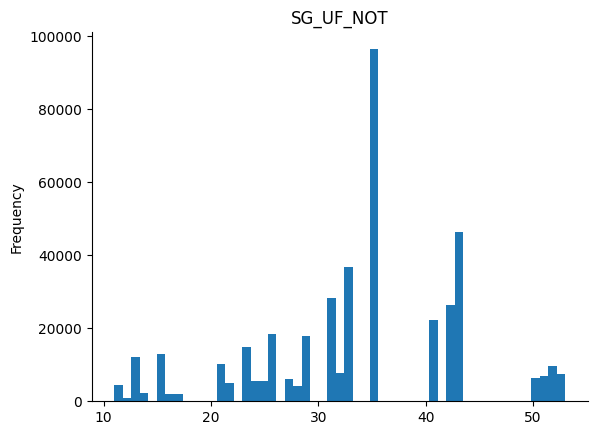

In [ ]:
df_aids['SG_UF_NOT'].plot(kind='hist', bins=53, title='SG_UF_NOT')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df_aids.describe()

,NU_IDADE_N,CS_RACA,SG_UF_NOT
count,640799.000000,415900.000000,419541.000000
mean,38.215333,2.847043,33.464203
std,12.020076,2.097731,9.599304
min,13.000000,1.000000,11.000000
25%,29.000000,1.000000,28.000000
50%,37.000000,2.000000,35.000000
75%,46.000000,4.000000,41.000000
max,130.000000,9.000000,53.000000


In [ ]:
df_aids.isna().sum()

,0
DT_NOTIFIC,0
CS_SEXO,92
NU_IDADE_N,339
CS_RACA,225238
SG_UF_NOT,221597


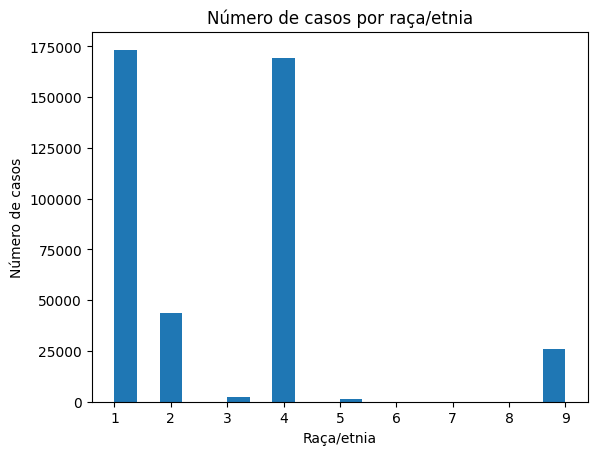

In [ ]:
df_aids['CS_RACA'].plot(kind='hist', bins=20, title='Número de casos por raça/etnia')
plt.xlabel('Raça/etnia')
plt.ylabel('Número de casos')
plt.show()

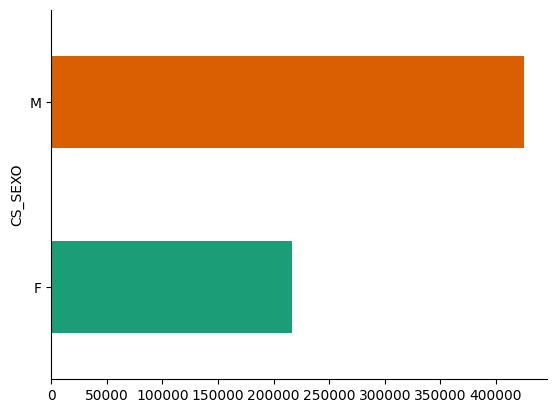

In [ ]:
df_aids.groupby('CS_SEXO').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

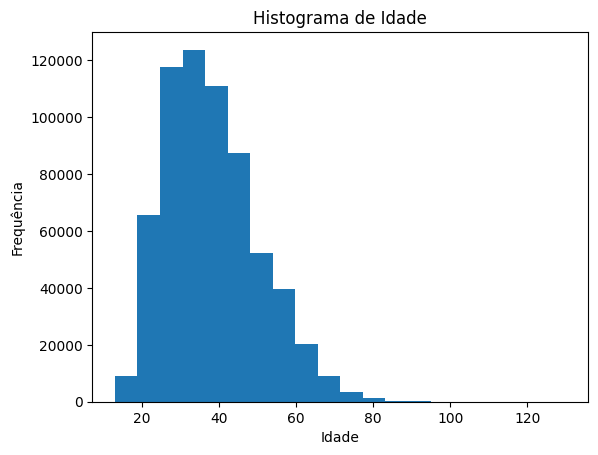

In [ ]:
plt.hist(df_aids["NU_IDADE_N"], bins = 20)
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('Histograma de Idade')
plt.show()

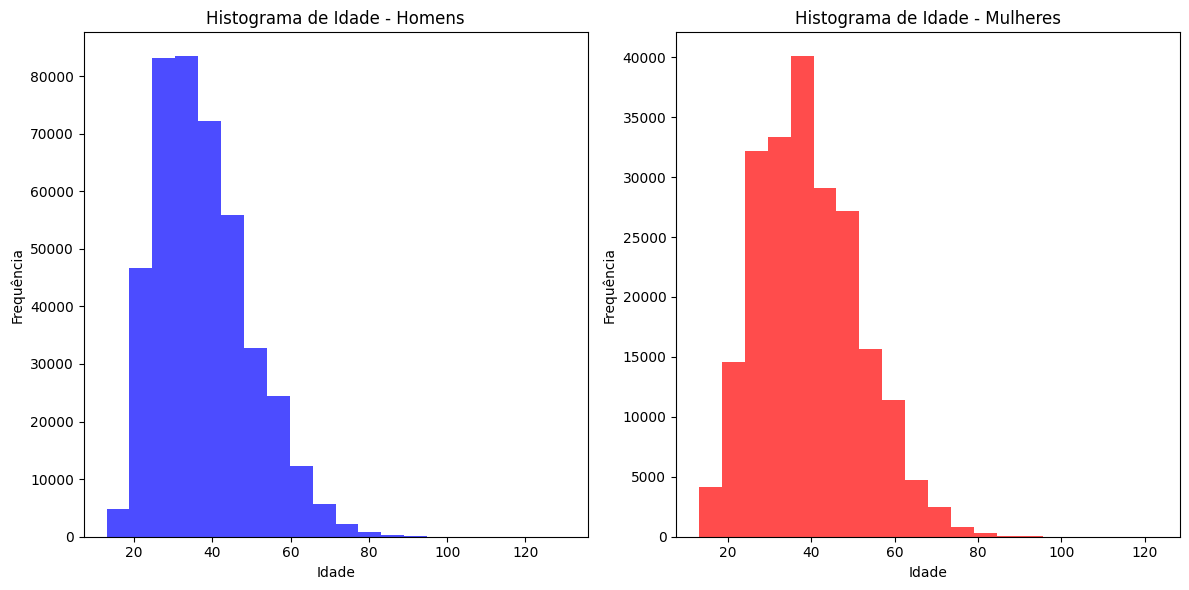

In [ ]:
# Filtering the dataset for males and females
df_male = df_aids[df_aids["CS_SEXO"] == "M"]
df_female = df_aids[df_aids["CS_SEXO"] == "F"]

# Creating the figure and two subplots side by side
plt.figure(figsize=(12, 6))

# First subplot for males
plt.subplot(1, 2, 1)  # (rows, columns, position)
plt.hist(df_male["NU_IDADE_N"], bins=20, color='blue', alpha=0.7)
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('Histograma de Idade - Homens')

# Second subplot for females
plt.subplot(1, 2, 2)  # (rows, columns, position)
plt.hist(df_female["NU_IDADE_N"], bins=20, color='red', alpha=0.7)
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('Histograma de Idade - Mulheres')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the histograms
plt.show()

<ipython-input-12-52042cbbfb13>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="CS_SEXO", y="NU_IDADE_N", data=df_aids, palette=colors)


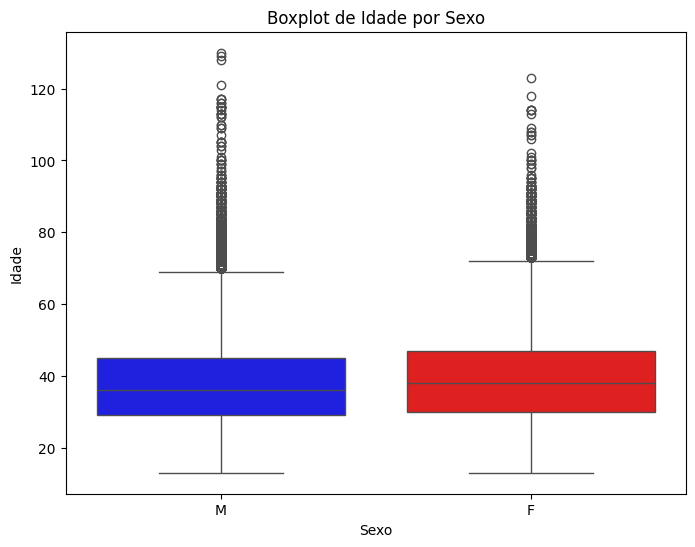

In [ ]:
# Define the colors used in the histograms (example)
colors = ['blue', 'red']  # You can adjust these colors based on your histograms

# Creating a boxplot for the two groups (Male and Female)
plt.figure(figsize=(8, 6))

# Boxplot
sns.boxplot(x="CS_SEXO", y="NU_IDADE_N", data=df_aids, palette=colors)

# Adding labels and title
plt.xlabel('Sexo')
plt.ylabel('Idade')
plt.title('Boxplot de Idade por Sexo')

# Show plot
plt.show()

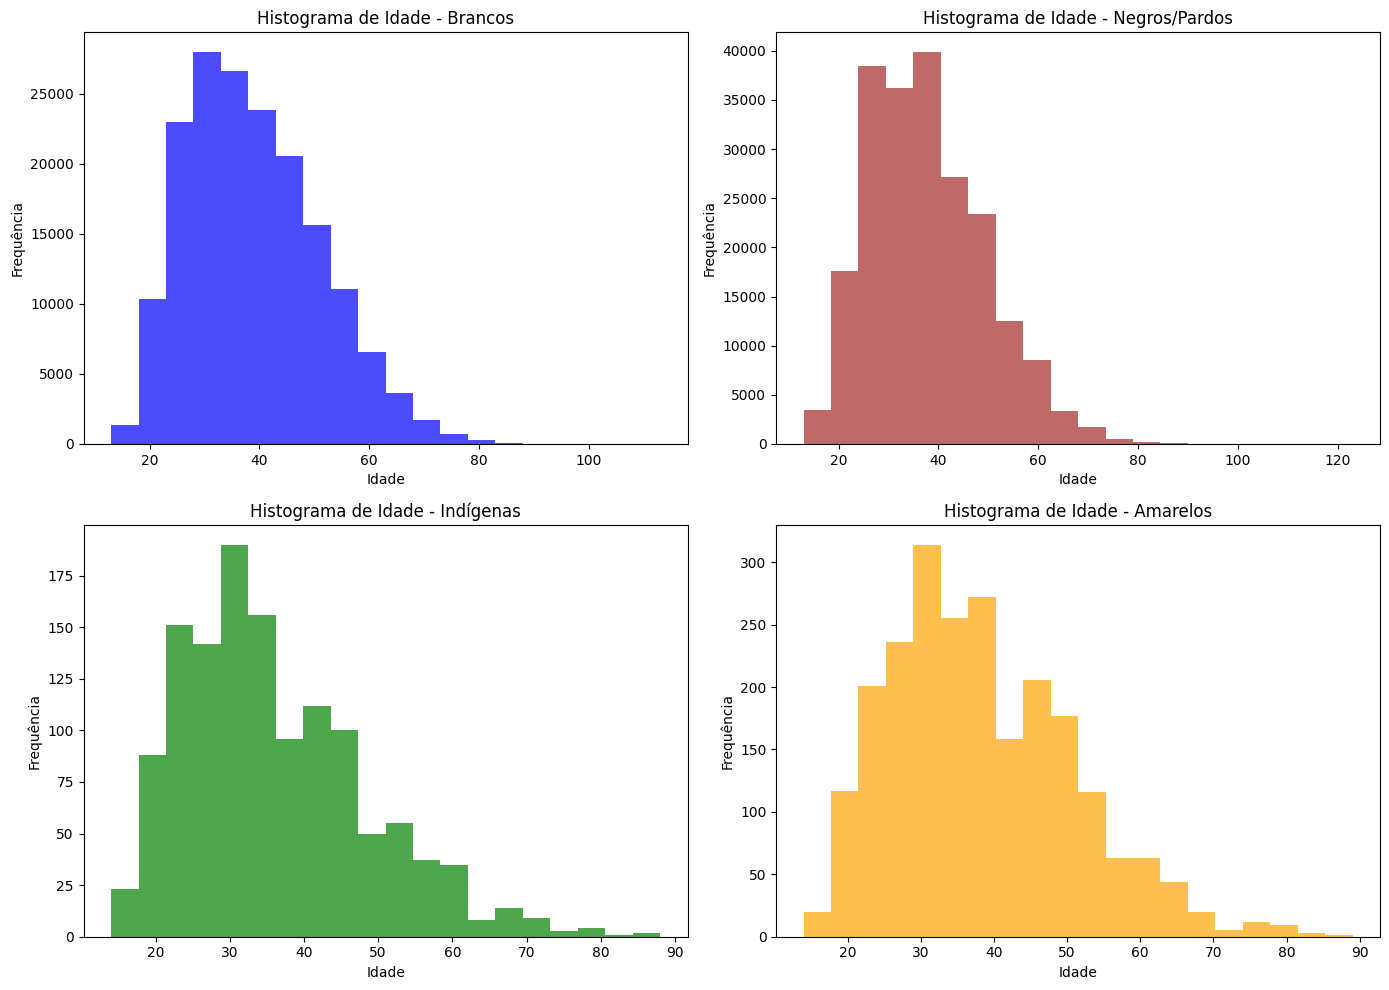

In [ ]:
# Correcting the filtering for the groups
df_brancos = df_aids[df_aids["CS_RACA"] == 1]
df_negros_pardos = df_aids[(df_aids["CS_RACA"] == 2) | (df_aids["CS_RACA"] == 4)]
df_indigenas = df_aids[df_aids["CS_RACA"] == 5]
df_amarelos = df_aids[df_aids["CS_RACA"] == 3]

# Creating a figure with 4 subplots (2 rows, 2 columns)
plt.figure(figsize=(14, 10))

# Histogram for brancos
plt.subplot(2, 2, 1)  # (rows, columns, position)
plt.hist(df_brancos["NU_IDADE_N"], bins=20, color='blue', alpha=0.7)
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('Histograma de Idade - Brancos')

# Histogram for negros/pardos
plt.subplot(2, 2, 2)  # (rows, columns, position)
plt.hist(df_negros_pardos["NU_IDADE_N"], bins=20, color='brown', alpha=0.7)
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('Histograma de Idade - Negros/Pardos')

# Histogram for indígenas
plt.subplot(2, 2, 3)  # (rows, columns, position)
plt.hist(df_indigenas["NU_IDADE_N"], bins=20, color='green', alpha=0.7)
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('Histograma de Idade - Indígenas')

# Histogram for amarelos
plt.subplot(2, 2, 4)  # (rows, columns, position)
plt.hist(df_amarelos["NU_IDADE_N"], bins=20, color='orange', alpha=0.7)
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('Histograma de Idade - Amarelos')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the histograms
plt.show()

<ipython-input-14-6acee597b6de>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_brancos["Group"] = "Brancos"
<ipython-input-14-6acee597b6de>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_negros_pardos["Group"] = "Negros e Pardos"
<ipython-input-14-6acee597b6de>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

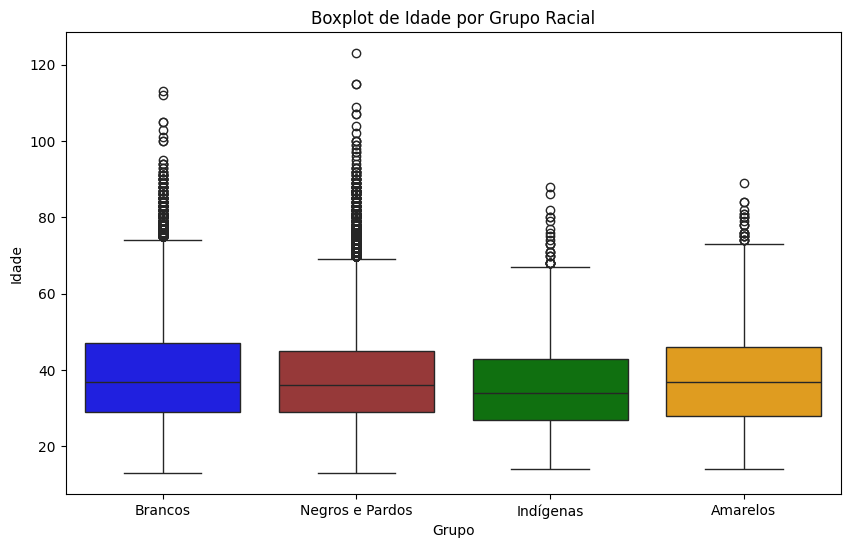

In [ ]:
# Define the colors used in the histograms (example)
colors = ['blue', 'brown', 'green', 'orange']  # You can adjust these colors based on your histograms

# Combine the data from all groups into one dataframe with a new 'Group' column
df_brancos["Group"] = "Brancos"
df_negros_pardos["Group"] = "Negros e Pardos"
df_indigenas["Group"] = "Indígenas"
df_amarelos["Group"] = "Amarelos"

# Concatenating the dataframes
df_combined = pd.concat([df_brancos, df_negros_pardos, df_indigenas, df_amarelos])

# Creating the boxplot with custom colors
plt.figure(figsize=(10, 6))
sns.boxplot(x="Group", y="NU_IDADE_N", data=df_combined, palette=colors)
plt.title("Boxplot de Idade por Grupo Racial")
plt.xlabel("Grupo")
plt.ylabel("Idade")

# Show plot
plt.show()

In [ ]:
# Remove rows with invalid date entries
df_aids = df_aids[df_aids['DT_NOTIFIC'].str.match(r'^\d{8}$')]  # Keep only rows with 8 digits

# Convert the DT_NOTIFIC column to datetime
df_aids['DT_NOTIFIC'] = pd.to_datetime(df_aids['DT_NOTIFIC'], format='%Y%m%d')

# Display the updated DataFrame
df_aids

<ipython-input-3-0ab5353800dc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aids['DT_NOTIFIC'] = pd.to_datetime(df_aids['DT_NOTIFIC'], format='%Y%m%d')


,DT_NOTIFIC,CS_SEXO,NU_IDADE_N,CS_RACA,SG_UF_NOT
29,2007-01-02,F,4039,4.0,NaN
80,2007-01-04,M,4045,9.0,NaN
108,2007-01-04,F,4041,4.0,NaN
129,2007-01-06,M,4026,4.0,NaN
170,2007-01-08,M,4038,1.0,NaN
...,...,...,...,...,...
641133,2023-06-30,M,4045,2.0,35.0
641134,2023-06-30,F,4042,1.0,42.0
641135,2023-06-30,M,4056,1.0,31.0
641136,2023-06-30,M,4060,1.0,32.0


In [ ]:
# Group by DT_NOTIFIC and count the number of cases
df_cases_count = df_aids.groupby('DT_NOTIFIC').size().reset_index(name='Number of Cases')

# Calculate the 30-day and 90-day moving averages
df_cases_count['30-Day Moving Average'] = df_cases_count['Number of Cases'].rolling(window=30).mean()
df_cases_count['90-Day Moving Average'] = df_cases_count['Number of Cases'].rolling(window=90).mean()

# Display the new DataFrame
df_cases_count

,DT_NOTIFIC,Number of Cases,30-Day Moving Average,90-Day Moving Average
0,1989-10-28,1,NaN,NaN
1,1991-10-30,1,NaN,NaN
2,1993-03-29,1,NaN,NaN
3,1995-10-12,1,NaN,NaN
4,1996-01-06,1,NaN,NaN
...,...,...,...,...
6072,2023-06-26,67,51.033333,55.377778
6073,2023-06-27,81,53.600000,55.622222
6074,2023-06-28,87,56.166667,55.722222
6075,2023-06-29,64,55.233333,55.500000


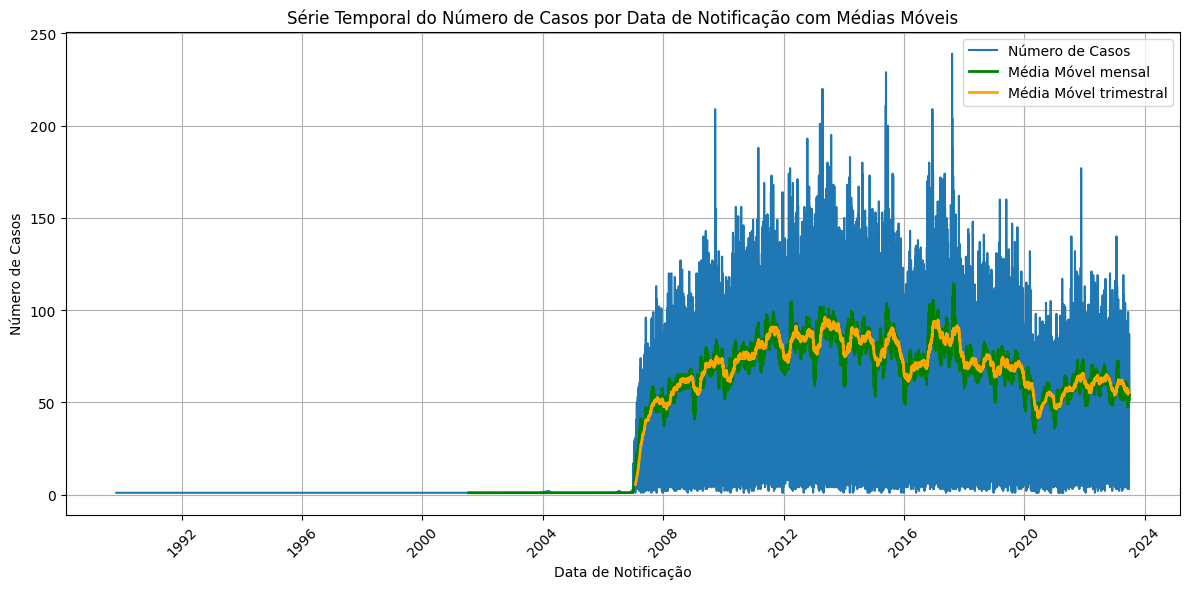

In [ ]:
# Plotting the time series
plt.figure(figsize=(12, 6))
plt.plot(df_cases_count['DT_NOTIFIC'], df_cases_count['Number of Cases'], label='Número de Casos')
plt.plot(df_cases_count['DT_NOTIFIC'], df_cases_count['30-Day Moving Average'], color='green', label='Média Móvel mensal', linewidth=2)
plt.plot(df_cases_count['DT_NOTIFIC'], df_cases_count['90-Day Moving Average'], color='orange', label='Média Móvel trimestral', linewidth=2)
plt.xlabel('Data de Notificação')
plt.ylabel('Número de Casos')
plt.title('Série Temporal do Número de Casos por Data de Notificação com Médias Móveis')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
# Step 1: Create the 'YEAR' column from 'DT_NOTIFIC'
df_cases_count['YEAR'] = df_cases_count['DT_NOTIFIC'].dt.year

# Step 2: Calculate the yearly mean number of cases
media_por_ano = df_cases_count.groupby('YEAR')['Number of Cases'].mean().reset_index()

# Step 3: Create the box plot and overlay the mean line
fig = px.box(df_cases_count, x='YEAR', y='Number of Cases', color='YEAR',
             title='Box plot do Número de Casos por Ano')

# Overlay the line plot for yearly means
fig.add_scatter(x=media_por_ano['YEAR'], y=media_por_ano['Number of Cases'],
                mode='lines+markers', name='Média', line=dict(color='red'))

# Show the plot
fig.show()

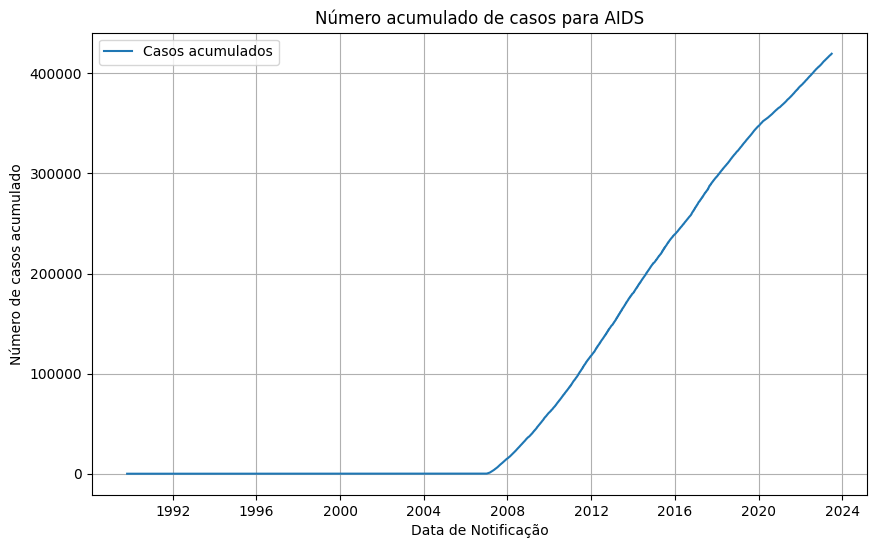

In [ ]:
# Calculate the cumulative sum of the number of cases
df_cases_count['Cumulative Cases'] = df_cases_count['Number of Cases'].cumsum()

# Plot the cumulative number of cases
plt.figure(figsize=(10,6))
plt.plot(df_cases_count['DT_NOTIFIC'], df_cases_count['Cumulative Cases'], label='Casos acumulados')
plt.title('Número acumulado de casos para AIDS')
plt.xlabel('Data de Notificação')
plt.ylabel('Número de casos acumulado')
plt.legend()
plt.grid(True)
plt.show()

Extraindo as propriedades temporais da série

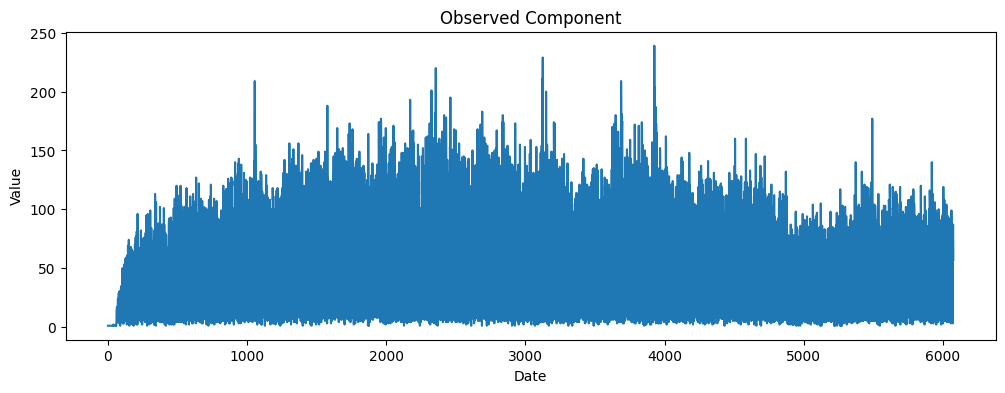

In [ ]:
# Decompose the time series with specified frequency
results_aids = seasonal_decompose(df_cases_count['Number of Cases'], period=90)  # Onde 90 indica frequência trimestral

# Plot the observed component
plt.figure(figsize=(12, 4))
results_aids.observed.plot()
plt.title('Observed Component')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

<Axes: >

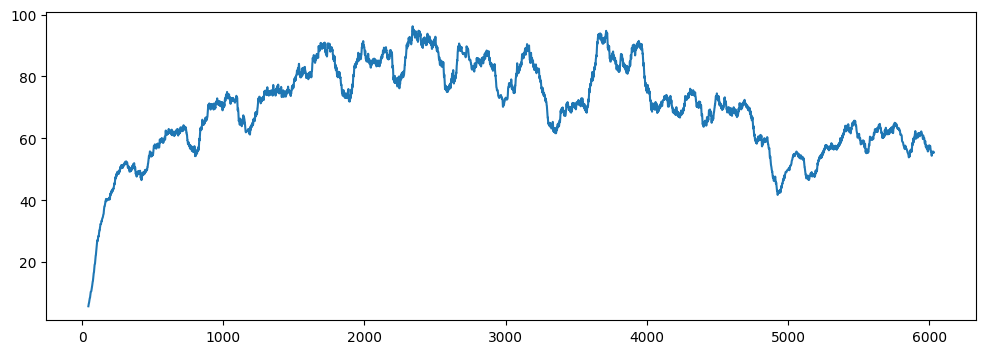

In [ ]:
# Encontrando a tendência
results_aids.trend.plot(figsize=(12,4))

<Axes: >

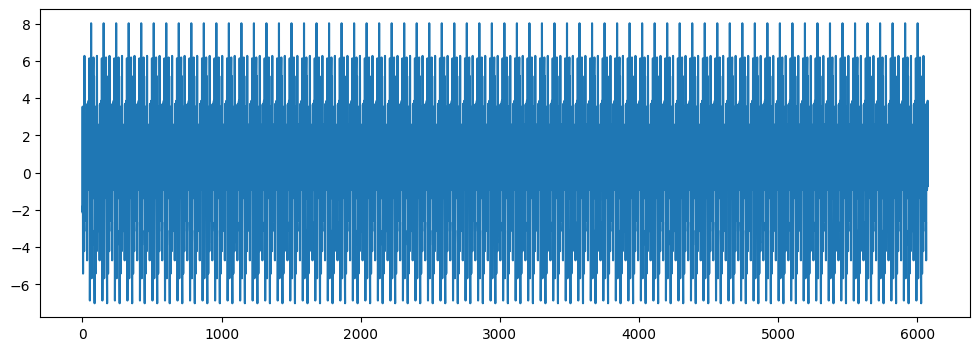

In [ ]:
# Encontrando a sazonalidade
results_aids.seasonal.plot(figsize=(12,4))

<Axes: >

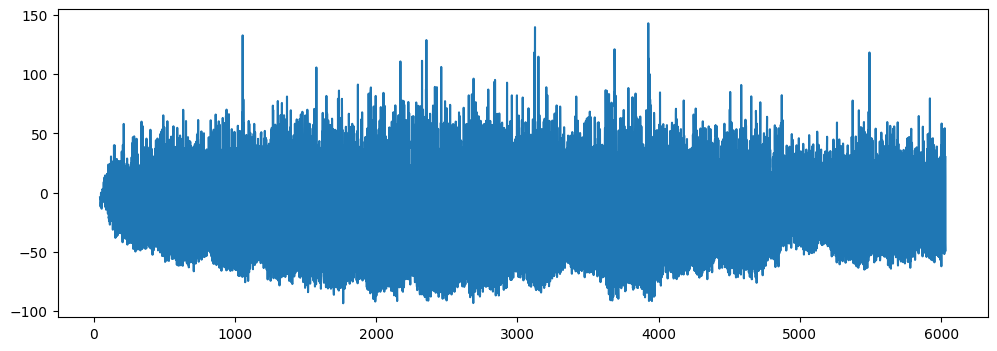

In [ ]:
# Resíduo
results_aids.resid.plot(figsize=(12,4))

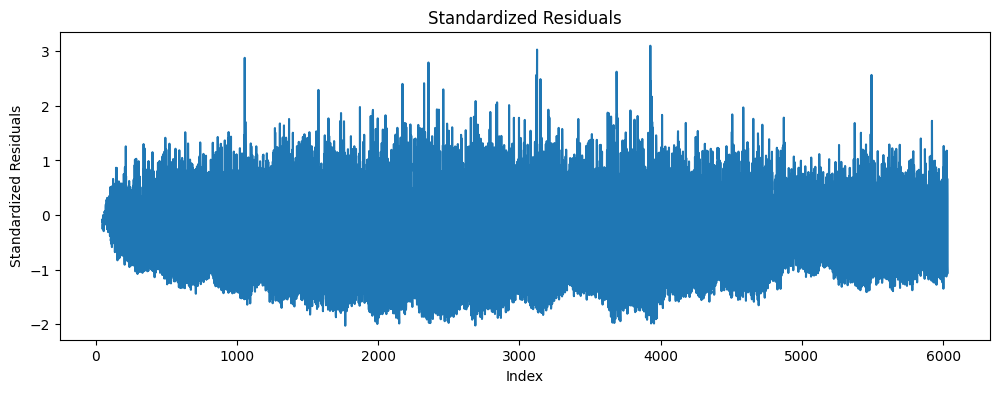

In [ ]:
# Standardizing the residuals
standardized_residuals = (results_aids.resid - results_aids.resid.mean()) / results_aids.resid.std()

# Plotting the standardized residuals
standardized_residuals.plot(figsize=(12, 4))
plt.title('Standardized Residuals')
plt.xlabel('Index')
plt.ylabel('Standardized Residuals')
plt.show()

<Axes: xlabel='resid', ylabel='Count'>

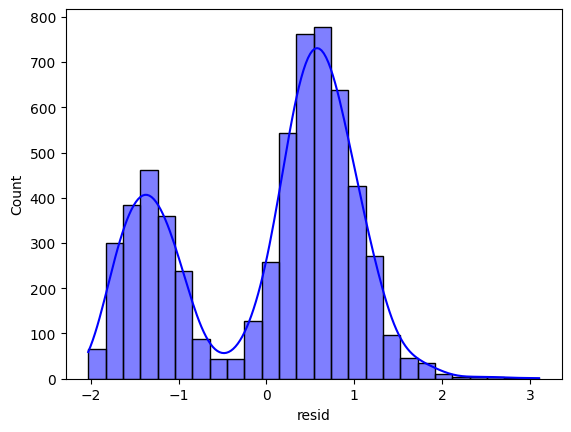

In [ ]:
sns.histplot(standardized_residuals, kde=True, color = 'blue')

É possível observar que os resíduos não estão centrados em zero, além de possuírem dois pontos de assimetria, indicando que existem informações importantes na nossa série que apenas a tendência e a sazonalidade não foram capazes de capitar.

**Observação:** não se observou melhora no ajuste aumentando ou diminuindo a suavização da média móvel.

In [ ]:
results_aids.resid

,resid
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
6072,NaN
6073,NaN
6074,NaN
6075,NaN


In [ ]:
results_aids.resid.isna().sum()

90

In [ ]:
results_aids.resid.dropna(inplace = True)

(array([-100,  -99,  -98,  -97,  -96,  -95,  -94,  -93,  -92,  -91,  -90,
         -89,  -88,  -87,  -86,  -85,  -84,  -83,  -82,  -81,  -80,  -79,
         -78,  -77,  -76,  -75,  -74,  -73,  -72,  -71,  -70,  -69,  -68,
         -67,  -66,  -65,  -64,  -63,  -62,  -61,  -60,  -59,  -58,  -57,
         -56,  -55,  -54,  -53,  -52,  -51,  -50,  -49,  -48,  -47,  -46,
         -45,  -44,  -43,  -42,  -41,  -40,  -39,  -38,  -37,  -36,  -35,
         -34,  -33,  -32,  -31,  -30,  -29,  -28,  -27,  -26,  -25,  -24,
         -23,  -22,  -21,  -20,  -19,  -18,  -17,  -16,  -15,  -14,  -13,
         -12,  -11,  -10,   -9,   -8,   -7,   -6,   -5,   -4,   -3,   -2,
          -1,    0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
          10,   11,   12,   13,   14,   15,   16,   17,   18,   19,   20,
          21,   22,   23,   24,   25,   26,   27,   28,   29,   30,   31,
          32,   33,   34,   35,   36,   37,   38,   39,   40,   41,   42,
          43,   44,   45,   46,   47, 

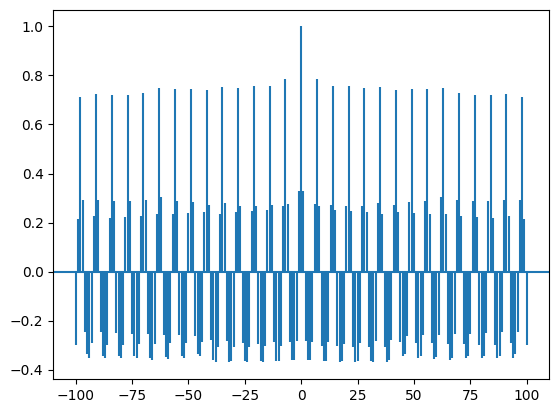

In [ ]:
plt.acorr(results_aids.resid.values, maxlags = 100)

As autocorrelações nos mostram que existe uma moderada relação entre uma determinada observação e aquelas que a antecedem e a sucedem, tal relação não se enfraquece com o tempo, indicando a existência de padrões de comportamento sazonal que se perpetuam ao longo do tempo.

# **Zika**

In [ ]:
with open('zika.csv', 'r') as file:
    lines = file.readlines()

cleaned_lines = []
for line in lines:
    if line.count('"') % 2 != 0:  # Check for unclosed quotes
        line = line.rstrip() + '"'  # Add closing quote
    cleaned_lines.append(line)

with open('cleaned_zika.csv', 'w') as file:
    file.writelines(cleaned_lines)

df_zika = pd.read_csv('cleaned_zika.csv')
df_zika

,CS_SEXO,CS_RACA,DT_NOTIFIC,NU_IDADE_N,SG_UF_NOT
0,M,NaN,20160101,4116,17
1,M,4.0,20160101,4048,29
2,M,4.0,20160101,4002,29
3,F,1.0,20160101,4077,29
4,M,9.0,20160101,4023,32
...,...,...,...,...,...
463024,M,4.0,20231031,4017,15
463025,F,4.0,20231031,3009,43
463026,F,4.0,20231031,4014,12
463027,F,4.0,20231031,4014,12


In [ ]:
df_zika["NU_IDADE_N"] = pd.to_numeric(df_zika["NU_IDADE_N"], errors='coerce')

df_zika["NU_IDADE_N"] = df_zika["NU_IDADE_N"].apply(lambda x: x - 4000 if x >= 4000 else x)

df_zika

,CS_SEXO,CS_RACA,DT_NOTIFIC,NU_IDADE_N,SG_UF_NOT
0,M,NaN,20160101,116,17
1,M,4.0,20160101,48,29
2,M,4.0,20160101,2,29
3,F,1.0,20160101,77,29
4,M,9.0,20160101,23,32
...,...,...,...,...,...
463024,M,4.0,20231031,17,15
463025,F,4.0,20231031,3009,43
463026,F,4.0,20231031,14,12
463027,F,4.0,20231031,14,12


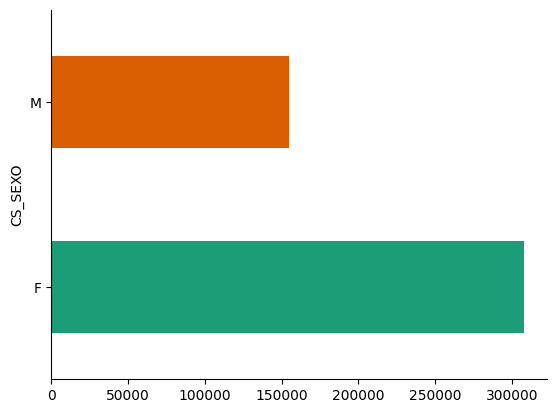

In [ ]:
df_zika_sexo = df_zika[(df_zika['CS_SEXO'] == 'M') | (df_zika['CS_SEXO'] == 'F')]

df_zika_sexo.groupby('CS_SEXO').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

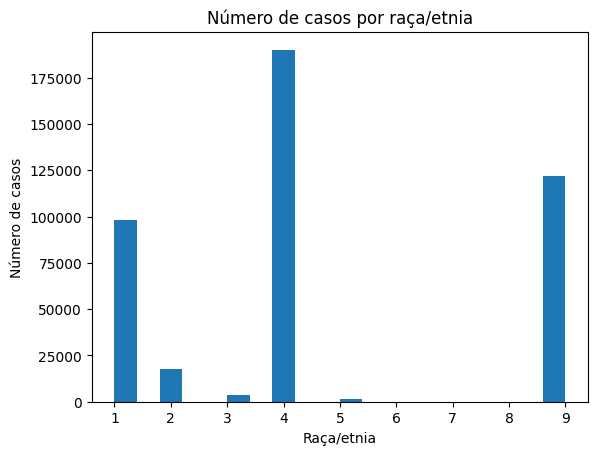

In [ ]:
df_zika['CS_RACA'].plot(kind='hist', bins=20, title='Número de casos por raça/etnia')
plt.xlabel('Raça/etnia')
plt.ylabel('Número de casos')
plt.show()

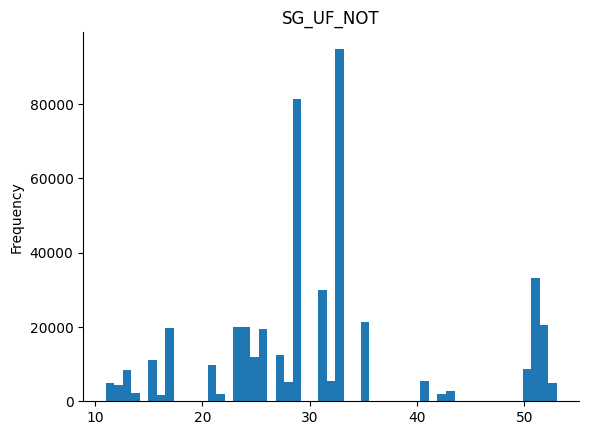

In [ ]:
df_zika['SG_UF_NOT'].plot(kind='hist', bins=53, title='SG_UF_NOT')
plt.gca().spines[['top', 'right',]].set_visible(False)

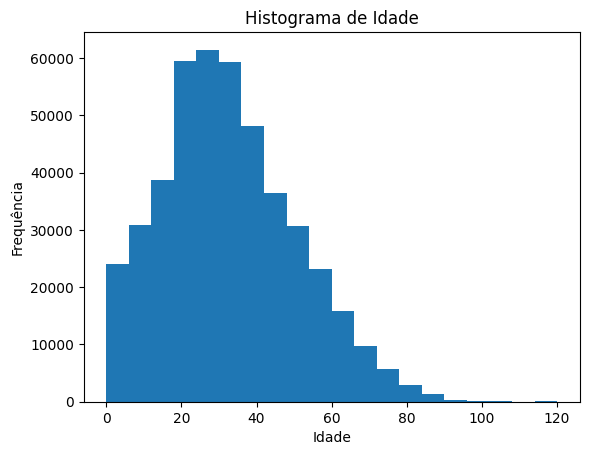

In [ ]:
df_zika_age = df_zika_sexo[df_zika_sexo['NU_IDADE_N'] <= 200]

plt.hist(df_zika_age["NU_IDADE_N"], bins = 20)
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('Histograma de Idade')
plt.show()

In [ ]:
df_zika_age.describe()

,CS_RACA,DT_NOTIFIC,NU_IDADE_N,SG_UF_NOT
count,419523.000000,4.485050e+05,448505.000000,448505.000000
mean,4.639462,2.017578e+07,32.305067,31.227427
std,2.974160,2.324040e+04,17.826496,10.207153
min,1.000000,2.016010e+07,0.000000,11.000000
25%,2.000000,2.016030e+07,20.000000,26.000000
50%,4.000000,2.016043e+07,30.000000,29.000000
75%,9.000000,2.019043e+07,44.000000,33.000000
max,9.000000,2.023123e+07,120.000000,53.000000


In [ ]:
df_zika.describe()

,CS_RACA,DT_NOTIFIC,NU_IDADE_N,SG_UF_NOT
count,433387.000000,4.630290e+05,463029.000000,463029.000000
mean,4.638256,2.017585e+07,109.629971,31.194204
std,2.972650,2.322563e+04,444.806633,10.225852
min,1.000000,2.016010e+07,0.000000,11.000000
25%,2.000000,2.016030e+07,20.000000,25.000000
50%,4.000000,2.016050e+07,31.000000,29.000000
75%,9.000000,2.019050e+07,45.000000,33.000000
max,9.000000,2.023123e+07,3076.000000,53.000000


In [ ]:
df_zika.isna().sum()

,0
CS_SEXO,0
CS_RACA,29642
DT_NOTIFIC,0
NU_IDADE_N,0
SG_UF_NOT,0


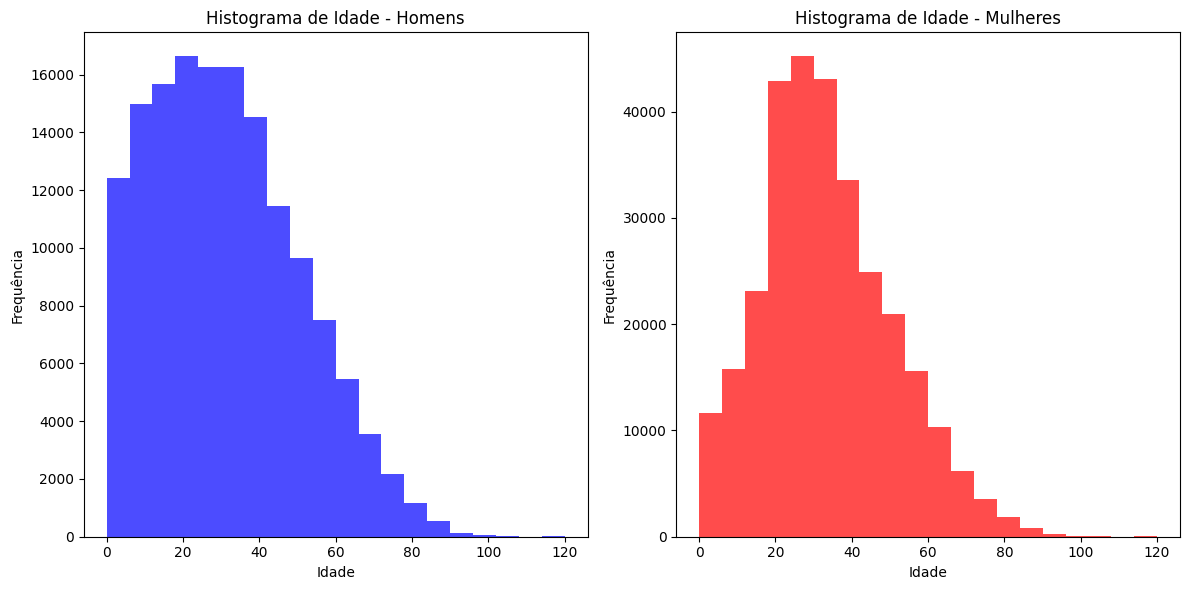

In [ ]:
# Filtering the dataset for males and females
df_male = df_zika_age[df_zika_age["CS_SEXO"] == "M"]
df_female = df_zika_age[df_zika_age["CS_SEXO"] == "F"]

# Creating the figure and two subplots side by side
plt.figure(figsize=(12, 6))

# First subplot for males
plt.subplot(1, 2, 1)  # (rows, columns, position)
plt.hist(df_male["NU_IDADE_N"], bins=20, color='blue', alpha=0.7)
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('Histograma de Idade - Homens')

# Second subplot for females
plt.subplot(1, 2, 2)  # (rows, columns, position)
plt.hist(df_female["NU_IDADE_N"], bins=20, color='red', alpha=0.7)
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('Histograma de Idade - Mulheres')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the histograms
plt.show()

<ipython-input-39-cd2632cff81c>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




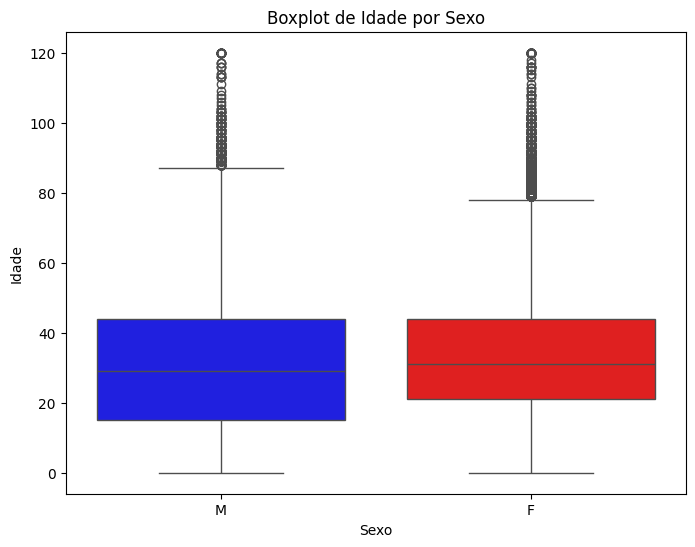

In [ ]:
# Define the colors used in the histograms (example)
colors = ['blue', 'red']  # You can adjust these colors based on your histograms

# Creating a boxplot for the two groups (Male and Female)
plt.figure(figsize=(8, 6))

# Boxplot
sns.boxplot(x="CS_SEXO", y="NU_IDADE_N", data=df_zika_age, palette=colors)

# Adding labels and title
plt.xlabel('Sexo')
plt.ylabel('Idade')
plt.title('Boxplot de Idade por Sexo')

# Show plot
plt.show()

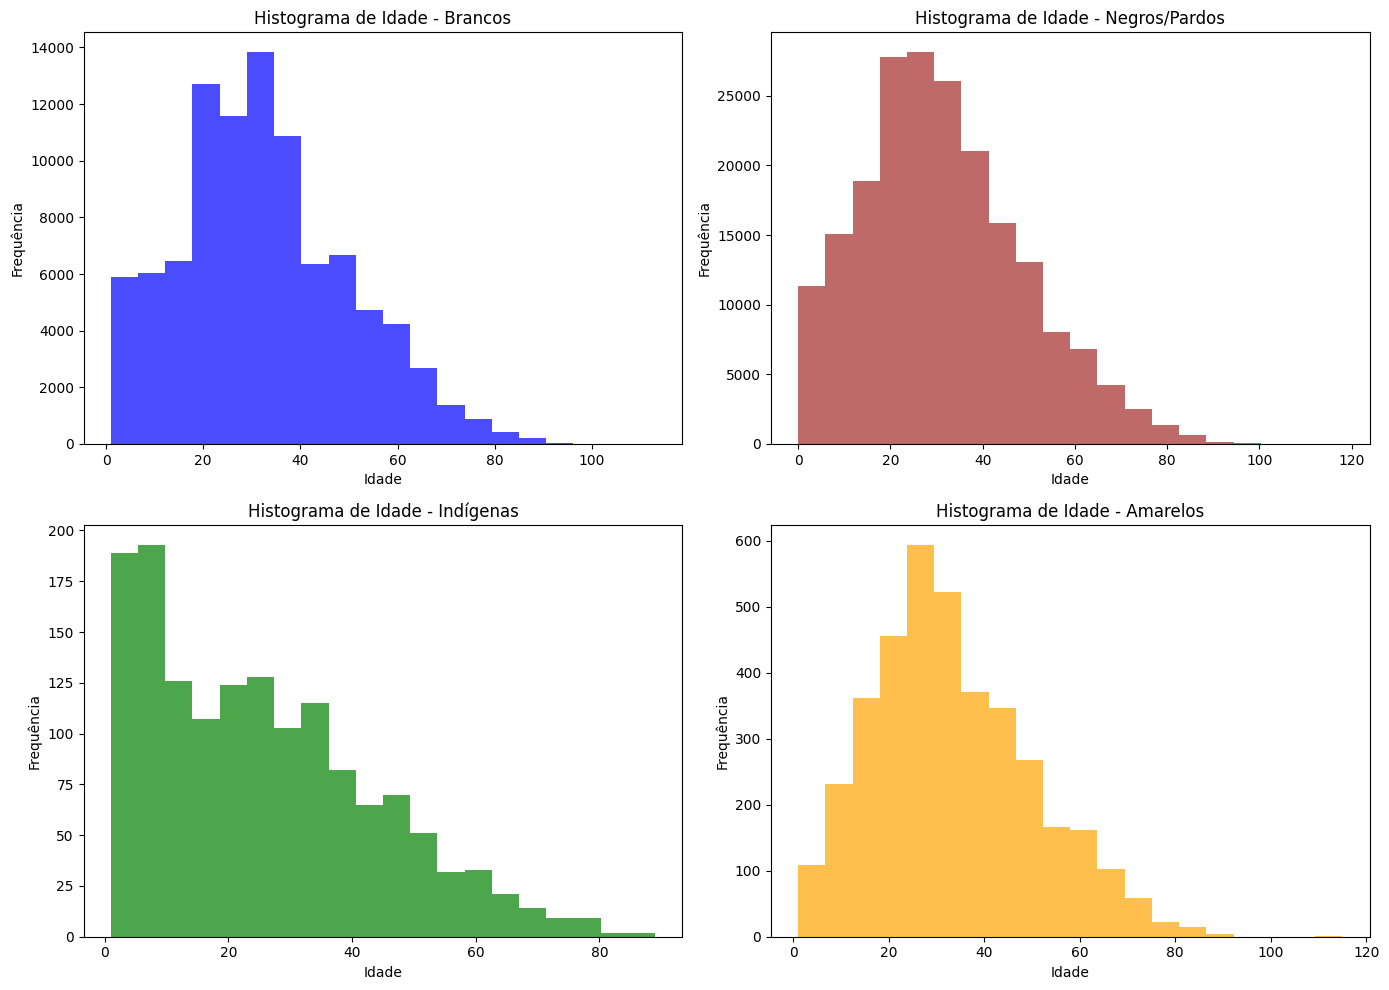

In [ ]:
# Correcting the filtering for the groups
df_brancos = df_zika_age[df_zika_age["CS_RACA"] == 1]
df_negros_pardos = df_zika_age[(df_zika_age["CS_RACA"] == 2) | (df_zika_age["CS_RACA"] == 4)]
df_indigenas = df_zika_age[df_zika_age["CS_RACA"] == 5]
df_amarelos = df_zika_age[df_zika_age["CS_RACA"] == 3]

# Creating a figure with 4 subplots (2 rows, 2 columns)
plt.figure(figsize=(14, 10))

# Histogram for brancos
plt.subplot(2, 2, 1)  # (rows, columns, position)
plt.hist(df_brancos["NU_IDADE_N"], bins=20, color='blue', alpha=0.7)
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('Histograma de Idade - Brancos')

# Histogram for negros/pardos
plt.subplot(2, 2, 2)  # (rows, columns, position)
plt.hist(df_negros_pardos["NU_IDADE_N"], bins=20, color='brown', alpha=0.7)
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('Histograma de Idade - Negros/Pardos')

# Histogram for indígenas
plt.subplot(2, 2, 3)  # (rows, columns, position)
plt.hist(df_indigenas["NU_IDADE_N"], bins=20, color='green', alpha=0.7)
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('Histograma de Idade - Indígenas')

# Histogram for amarelos
plt.subplot(2, 2, 4)  # (rows, columns, position)
plt.hist(df_amarelos["NU_IDADE_N"], bins=20, color='orange', alpha=0.7)
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('Histograma de Idade - Amarelos')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the histograms
plt.show()

<ipython-input-41-6acee597b6de>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-41-6acee597b6de>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-41-6acee597b6de>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-41-6acee59

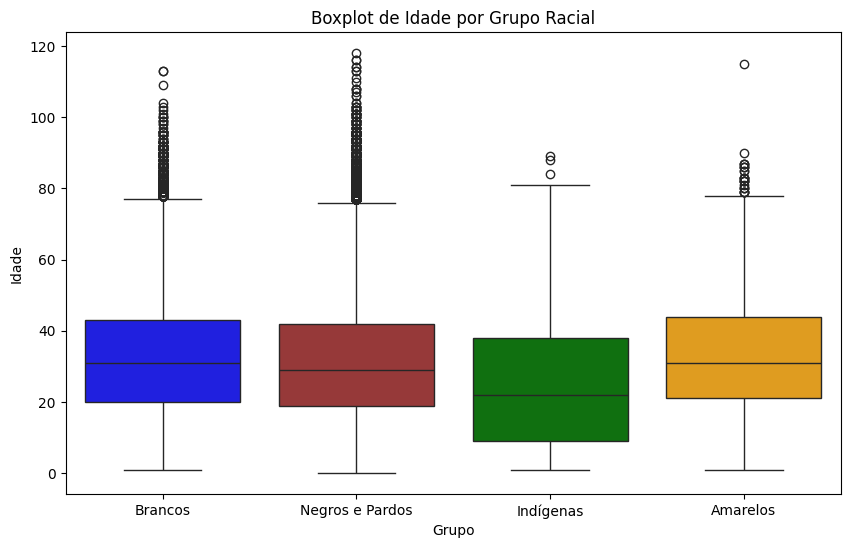

In [ ]:
# Define the colors used in the histograms (example)
colors = ['blue', 'brown', 'green', 'orange']  # You can adjust these colors based on your histograms

# Combine the data from all groups into one dataframe with a new 'Group' column
df_brancos["Group"] = "Brancos"
df_negros_pardos["Group"] = "Negros e Pardos"
df_indigenas["Group"] = "Indígenas"
df_amarelos["Group"] = "Amarelos"

# Concatenating the dataframes
df_combined = pd.concat([df_brancos, df_negros_pardos, df_indigenas, df_amarelos])

# Creating the boxplot with custom colors
plt.figure(figsize=(10, 6))
sns.boxplot(x="Group", y="NU_IDADE_N", data=df_combined, palette=colors)
plt.title("Boxplot de Idade por Grupo Racial")
plt.xlabel("Grupo")
plt.ylabel("Idade")

# Show plot
plt.show()

In [ ]:
# Convert DT_NOTIFIC to string first to ensure .str methods work
df_zika['DT_NOTIFIC'] = df_zika['DT_NOTIFIC'].astype(str)

# Now remove rows with invalid date entries (keep only rows with 8 digits)
df_zika = df_zika[df_zika['DT_NOTIFIC'].str.match(r'^\d{8}$')]

# Convert the DT_NOTIFIC column to datetime
df_zika['DT_NOTIFIC'] = pd.to_datetime(df_zika['DT_NOTIFIC'], format='%Y%m%d')

# Display the updated DataFrame
df_zika

,CS_SEXO,CS_RACA,DT_NOTIFIC,NU_IDADE_N,SG_UF_NOT
0,M,NaN,2016-01-01,4116,17
1,M,4.0,2016-01-01,4048,29
2,M,4.0,2016-01-01,4002,29
3,F,1.0,2016-01-01,4077,29
4,M,9.0,2016-01-01,4023,32
...,...,...,...,...,...
463024,M,4.0,2023-10-31,4017,15
463025,F,4.0,2023-10-31,3009,43
463026,F,4.0,2023-10-31,4014,12
463027,F,4.0,2023-10-31,4014,12


In [ ]:
# Group by DT_NOTIFIC and count the number of cases
df_cases_count = df_zika.groupby('DT_NOTIFIC').size().reset_index(name='Number of Cases')

# Calculate the 7-day and 90-day moving averages
df_cases_count['7-Day Moving Average'] = df_cases_count['Number of Cases'].rolling(window=7).mean()
df_cases_count['30-Day Moving Average'] = df_cases_count['Number of Cases'].rolling(window=30).mean()

# Display the new DataFrame
df_cases_count

,DT_NOTIFIC,Number of Cases,7-Day Moving Average,30-Day Moving Average
0,2016-01-01,289,NaN,NaN
1,2016-01-02,466,NaN,NaN
2,2016-01-03,459,NaN,NaN
3,2016-01-04,1476,NaN,NaN
4,2016-01-05,1595,NaN,NaN
...,...,...,...,...
2916,2023-12-27,79,37.428571,37.700000
2917,2023-12-28,51,37.142857,38.066667
2918,2023-12-29,31,37.285714,37.666667
2919,2023-12-30,15,38.142857,37.033333


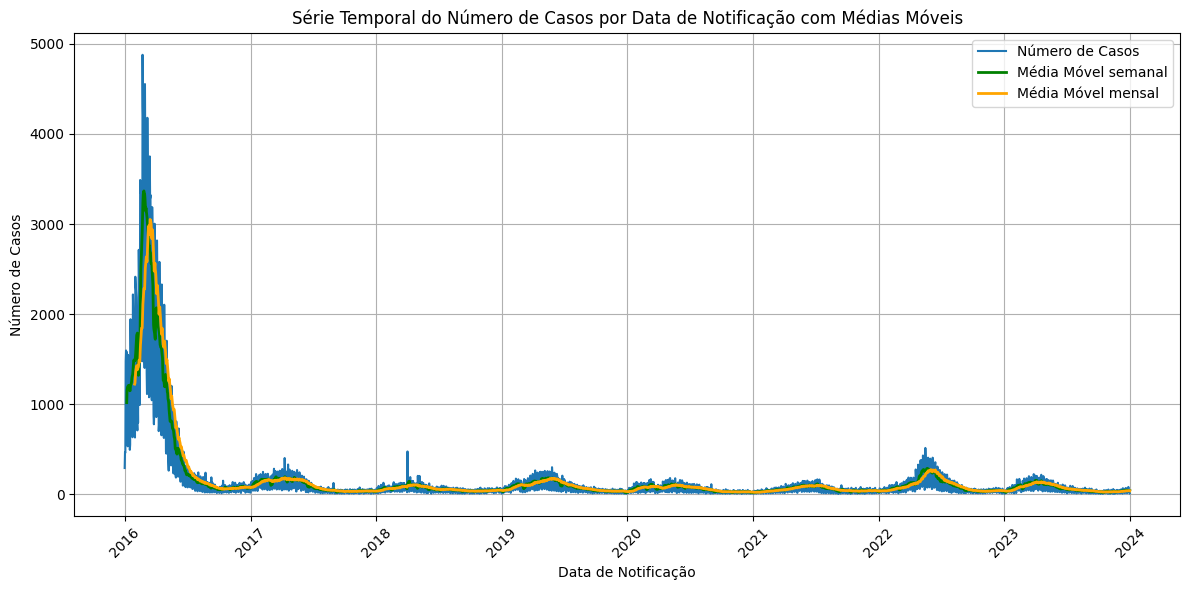

In [ ]:
# Plotting the time series
plt.figure(figsize=(12, 6))
plt.plot(df_cases_count['DT_NOTIFIC'], df_cases_count['Number of Cases'], label='Número de Casos')
plt.plot(df_cases_count['DT_NOTIFIC'], df_cases_count['7-Day Moving Average'], color='green', label='Média Móvel semanal', linewidth=2)
plt.plot(df_cases_count['DT_NOTIFIC'], df_cases_count['30-Day Moving Average'], color='orange', label='Média Móvel mensal', linewidth=2)
plt.xlabel('Data de Notificação')
plt.ylabel('Número de Casos')
plt.title('Série Temporal do Número de Casos por Data de Notificação com Médias Móveis')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
# Step 1: Create the 'YEAR' column from 'DT_NOTIFIC'
df_cases_count['YEAR'] = df_cases_count['DT_NOTIFIC'].dt.year

# Step 2: Calculate the yearly mean number of cases
media_por_ano = df_cases_count.groupby('YEAR')['Number of Cases'].mean().reset_index()

# Step 3: Create the box plot and overlay the mean line
fig = px.box(df_cases_count, x='YEAR', y='Number of Cases', color='YEAR',
             title='Box plot do Número de Casos por Ano')

# Overlay the line plot for yearly means
fig.add_scatter(x=media_por_ano['YEAR'], y=media_por_ano['Number of Cases'],
                mode='lines+markers', name='Média', line=dict(color='red'))

# Show the plot
fig.show()

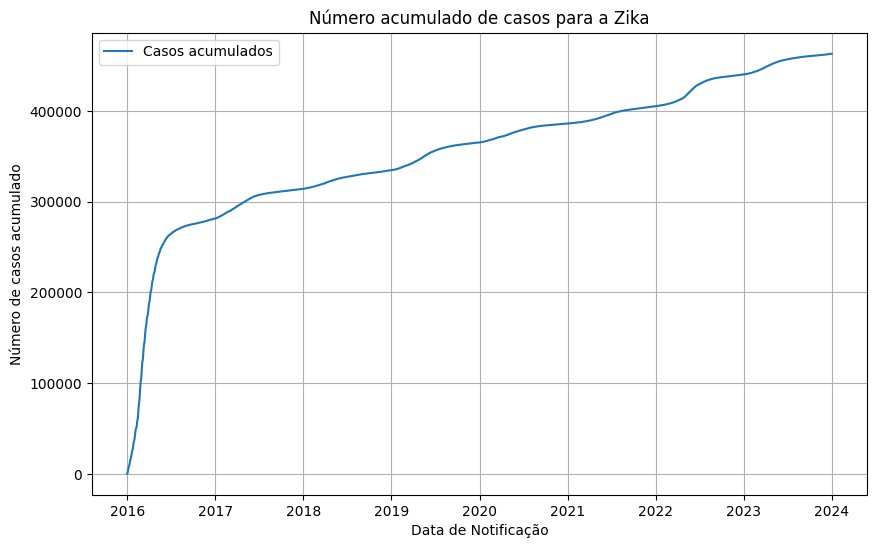

In [ ]:
# Calculate the cumulative sum of the number of cases
df_cases_count['Cumulative Cases'] = df_cases_count['Number of Cases'].cumsum()

# Plot the cumulative number of cases
plt.figure(figsize=(10,6))
plt.plot(df_cases_count['DT_NOTIFIC'], df_cases_count['Cumulative Cases'], label='Casos acumulados')
plt.title('Número acumulado de casos para a Zika')
plt.xlabel('Data de Notificação')
plt.ylabel('Número de casos acumulado')
plt.legend()
plt.grid(True)
plt.show()

Extraindo as propriedades temporais da série

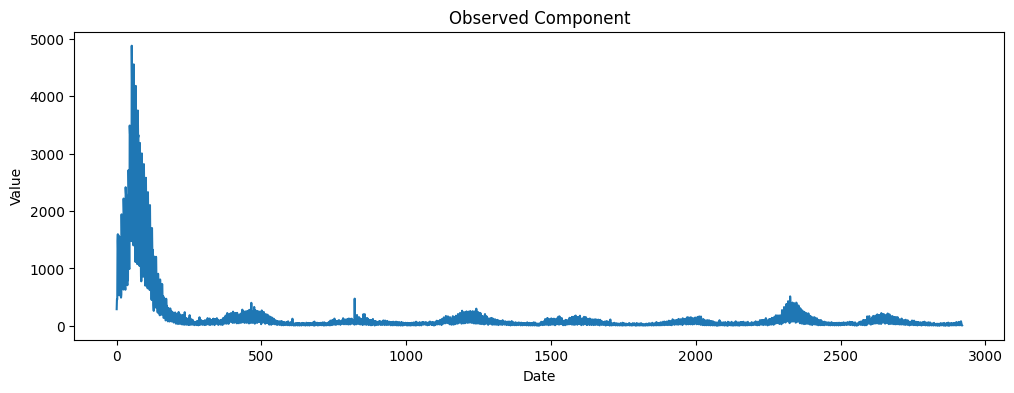

In [ ]:
# Decompose the time series with specified frequency
results_zika = seasonal_decompose(df_cases_count['Number of Cases'], period=30)  # Onde 30 indica frequência mensal

# Plot the observed component
plt.figure(figsize=(12, 4))
results_zika.observed.plot()
plt.title('Observed Component')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

<Axes: >

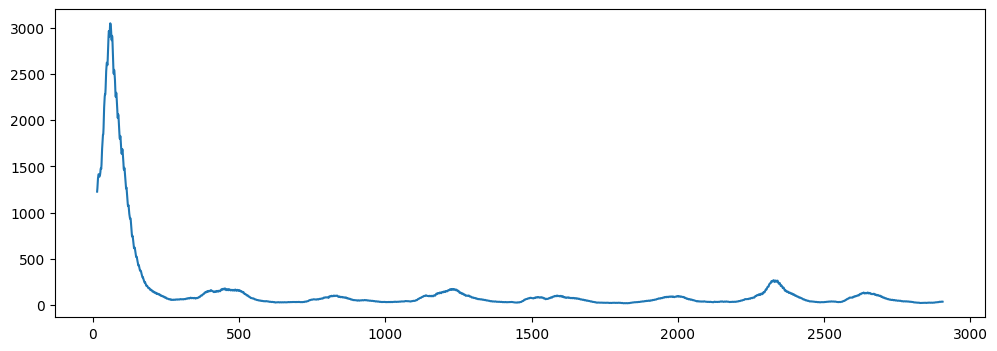

In [ ]:
# Encontrando a tendência
results_zika.trend.plot(figsize=(12,4))

<Axes: >

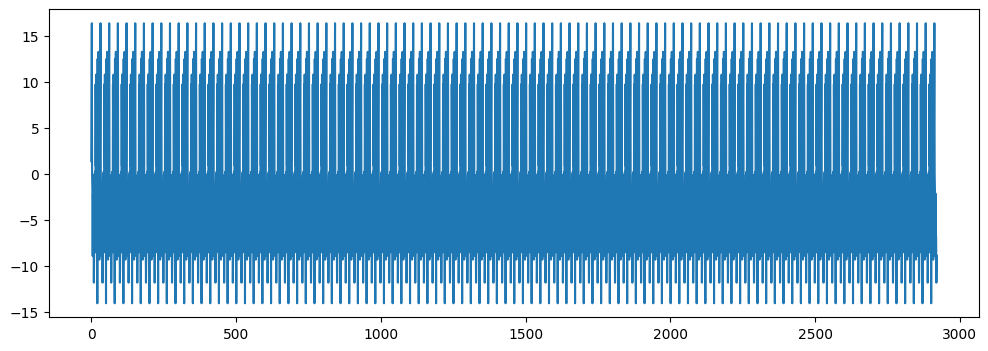

In [ ]:
# Encontrando a sazonalidade
results_zika.seasonal.plot(figsize=(12,4))

<Axes: >

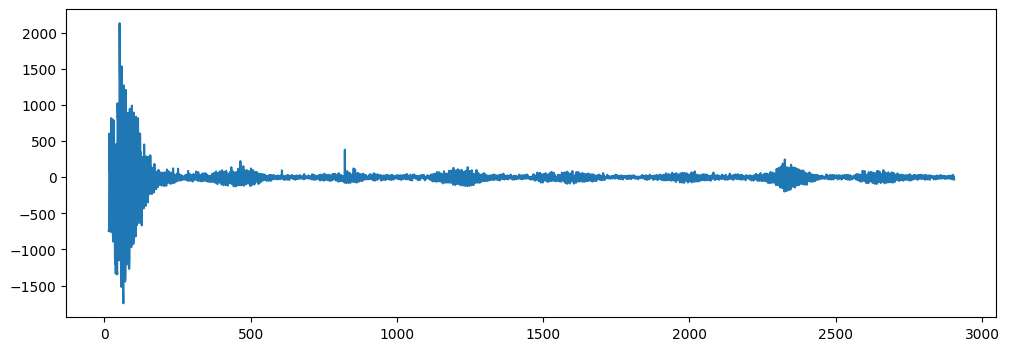

In [ ]:
# Resíduo
results_zika.resid.plot(figsize=(12,4))

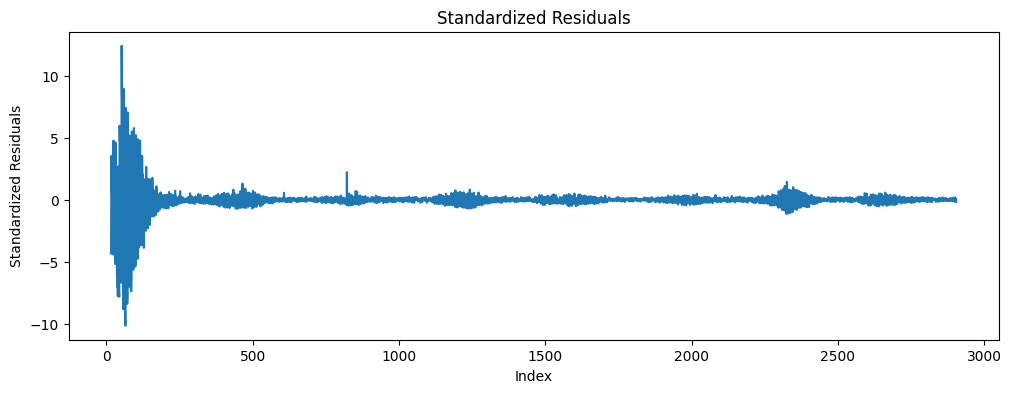

In [ ]:
# Standardizing the residuals
standardized_residuals = (results_zika.resid - results_zika.resid.mean()) / results_zika.resid.std()

# Plotting the standardized residuals
standardized_residuals.plot(figsize=(12, 4))
plt.title('Standardized Residuals')
plt.xlabel('Index')
plt.ylabel('Standardized Residuals')
plt.show()

<Axes: xlabel='resid', ylabel='Count'>

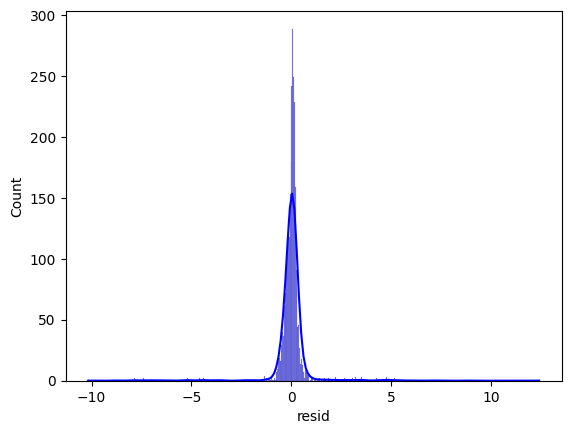

In [ ]:
sns.histplot(standardized_residuals, kde=True, color = 'blue')

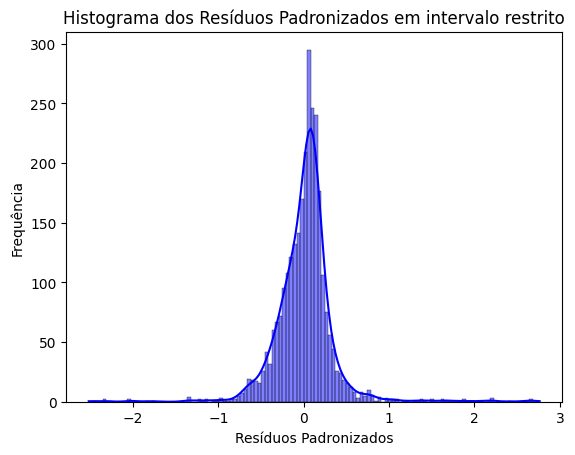

In [ ]:
# Filter standardized residuals to be between -3 and 3
filtered_residuals = standardized_residuals[(standardized_residuals >= -3) & (standardized_residuals <= 3)]

# Plot the histogram with KDE (Kernel Density Estimate)
sns.histplot(filtered_residuals, kde=True, color='blue')
plt.title('Histograma dos Resíduos Padronizados em intervalo restrito')
plt.xlabel('Resíduos Padronizados')
plt.ylabel('Frequência')
plt.show()

Como é possível observar com base no histograma dos resíduos, temos que a extração da tendência e sazonalidade são capazes de explicar o comportamento dos dados, uma vez que estes seguem uma distribuição razoávelmente normal centrada em zero, apesar de a visualização da dispersão dos resíduos nos trazer evidências de comportamentos mistos e não homocedásticos

In [ ]:
results_zika.resid

,resid
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2916,NaN
2917,NaN
2918,NaN
2919,NaN


In [ ]:
results_zika.resid.isna().sum()

30

In [ ]:
results_zika.resid.dropna(inplace = True)

(array([-100,  -99,  -98,  -97,  -96,  -95,  -94,  -93,  -92,  -91,  -90,
         -89,  -88,  -87,  -86,  -85,  -84,  -83,  -82,  -81,  -80,  -79,
         -78,  -77,  -76,  -75,  -74,  -73,  -72,  -71,  -70,  -69,  -68,
         -67,  -66,  -65,  -64,  -63,  -62,  -61,  -60,  -59,  -58,  -57,
         -56,  -55,  -54,  -53,  -52,  -51,  -50,  -49,  -48,  -47,  -46,
         -45,  -44,  -43,  -42,  -41,  -40,  -39,  -38,  -37,  -36,  -35,
         -34,  -33,  -32,  -31,  -30,  -29,  -28,  -27,  -26,  -25,  -24,
         -23,  -22,  -21,  -20,  -19,  -18,  -17,  -16,  -15,  -14,  -13,
         -12,  -11,  -10,   -9,   -8,   -7,   -6,   -5,   -4,   -3,   -2,
          -1,    0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
          10,   11,   12,   13,   14,   15,   16,   17,   18,   19,   20,
          21,   22,   23,   24,   25,   26,   27,   28,   29,   30,   31,
          32,   33,   34,   35,   36,   37,   38,   39,   40,   41,   42,
          43,   44,   45,   46,   47, 

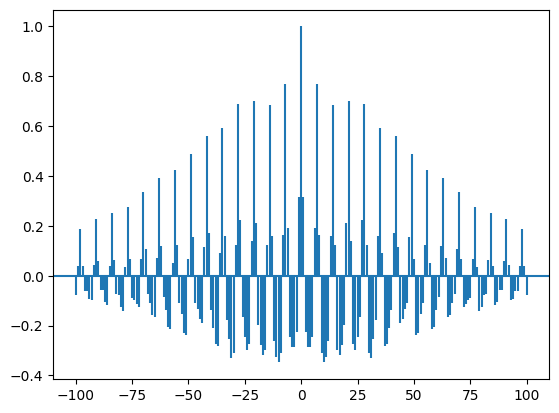

In [ ]:
plt.acorr(results_zika.resid.values, maxlags = 100)

As autocorrelações nos mostram que existe uma moderada relação entre uma determinada observação e as 30 imediatamnete mais próximas, tanto as que a antecedem e a sucedem, tal relação tende a enfraquece conforme o tempo, indicando a existência de padrões de comportamento sazonal, mas que não se perpetuam com o tempo.

# **Chikungunya**

In [ ]:
# Specify the encoding to avoid UnicodeDecodeError
with open('chik.csv', 'r', encoding='latin1') as file:  # 'latin1' or another encoding depending on the file
    lines = file.readlines()

cleaned_lines = []
for line in lines:
    if line.count('"') % 2 != 0:  # Check for unclosed quotes
        line = line.rstrip() + '"'  # Add closing quote
    cleaned_lines.append(line)

with open('cleaned_chik.csv', 'w', encoding='utf-8') as file:  # Write back as UTF-8
    file.writelines(cleaned_lines)

# Reading the cleaned file into a DataFrame
df_chik = pd.read_csv('cleaned_chik.csv')
df_chik

<ipython-input-18-7d2d37114ddc>:15: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_chik = pd.read_csv('cleaned_chik.csv')


,DT_NOTIFIC,CS_SEXO,NU_IDADE_N,SG_UF_NOT,CS_RACA
0,20150101,F,4027,28,4.0
1,20150101,F,4050,24,4.0
2,20150101,M,4012,26,2.0
3,20150101,F,4041,29,9.0
4,20150101,F,4027,29,1.0
...,...,...,...,...,...
1668010,20230326,M,2001,17,4
1668011,20230327,F,4071,17,4
1668012,20230327,M,4043,17,4
1668013,20230329,M,4006,17,4


In [ ]:
df_chik["NU_IDADE_N"] = pd.to_numeric(df_chik["NU_IDADE_N"], errors='coerce')

df_chik["NU_IDADE_N"] = df_chik["NU_IDADE_N"].apply(lambda x: x - 4000 if x >= 4000 else x)

df_chik

,DT_NOTIFIC,CS_SEXO,NU_IDADE_N,SG_UF_NOT,CS_RACA
0,20150101,F,27,28,4.0
1,20150101,F,50,24,4.0
2,20150101,M,12,26,2.0
3,20150101,F,41,29,9.0
4,20150101,F,27,29,1.0
...,...,...,...,...,...
1668010,20230326,M,2001,17,4
1668011,20230327,F,71,17,4
1668012,20230327,M,43,17,4
1668013,20230329,M,6,17,4


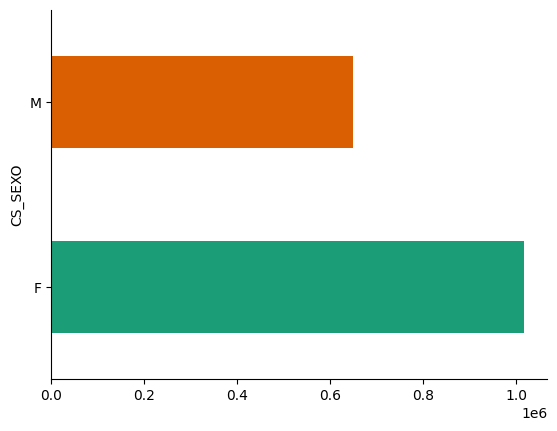

In [ ]:
df_chik_sexo = df_chik[(df_chik['CS_SEXO'] == 'M') | (df_chik['CS_SEXO'] == 'F')]

df_chik_sexo.groupby('CS_SEXO').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df_chik.isna().sum()

,0
DT_NOTIFIC,0
CS_SEXO,12
NU_IDADE_N,0
SG_UF_NOT,0
CS_RACA,25210


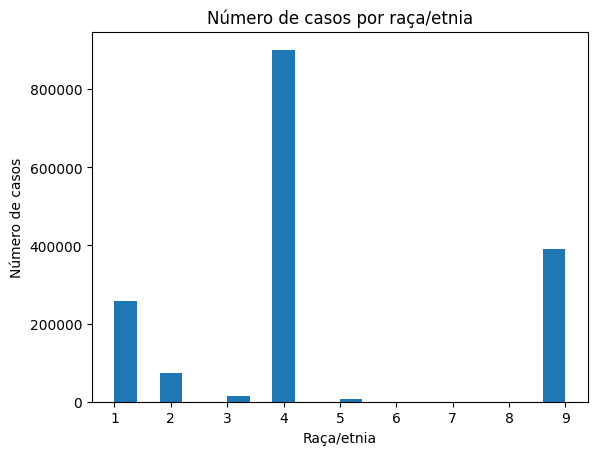

In [ ]:
# Convert 'CS_RACA' to numeric (forcing any non-numeric values to NaN), then drop NaN
df_chik_raca = pd.to_numeric(df_chik['CS_RACA'], errors='coerce').dropna()

# Now plot the histogram
df_chik_raca.plot(kind='hist', bins=20, title='Número de casos por raça/etnia')
plt.xlabel('Raça/etnia')
plt.ylabel('Número de casos')
plt.show()

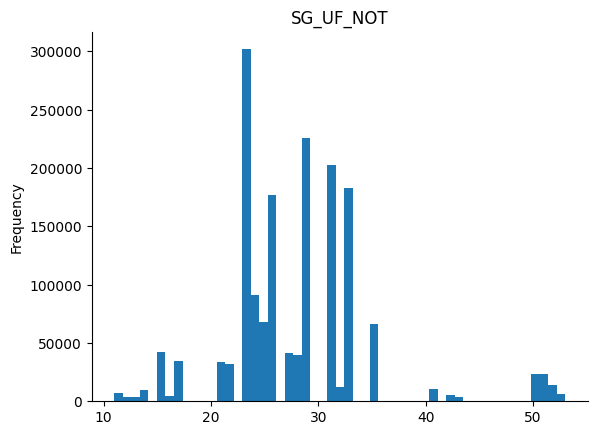

In [ ]:
df_chik['SG_UF_NOT'].plot(kind='hist', bins=53, title='SG_UF_NOT')
plt.gca().spines[['top', 'right',]].set_visible(False)

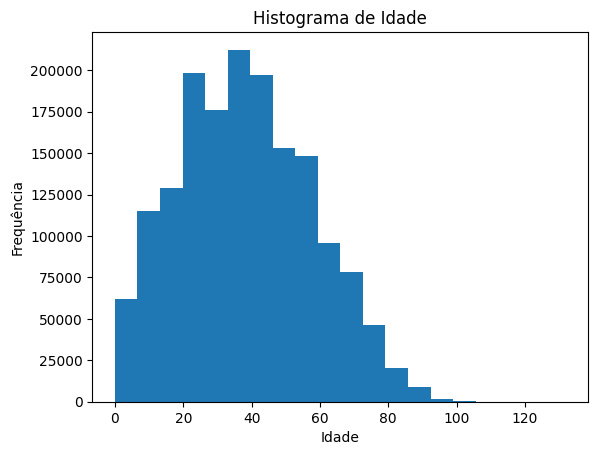

In [ ]:
df_chik_age = df_chik_sexo[df_chik_sexo['NU_IDADE_N'] <= 200]

plt.hist(df_chik_age["NU_IDADE_N"], bins = 20)
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('Histograma de Idade')
plt.show()

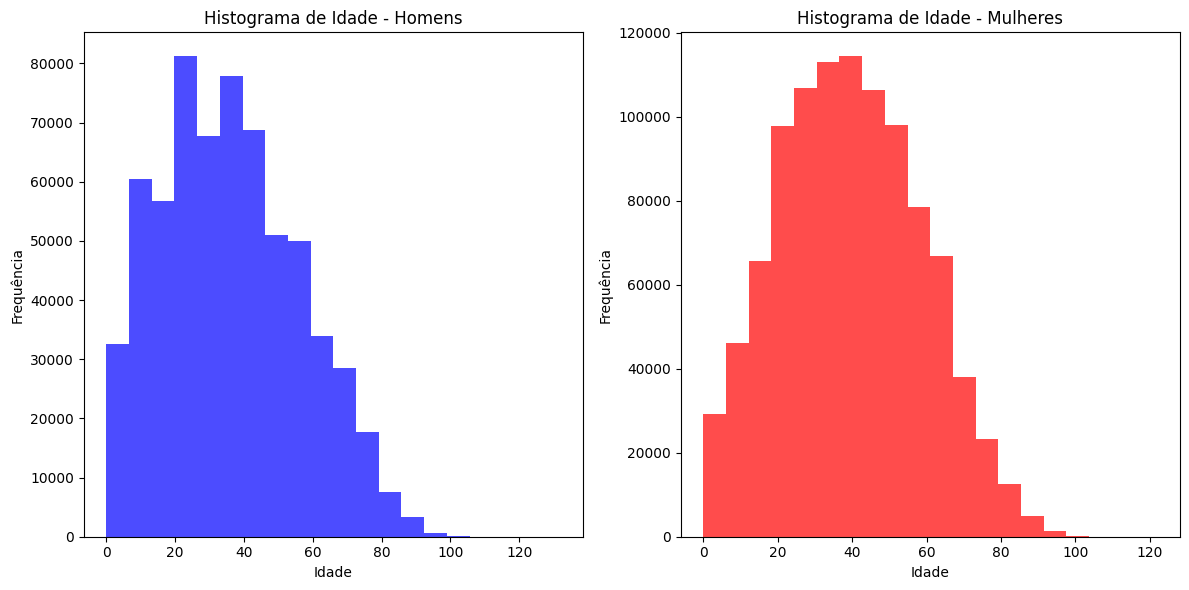

In [ ]:
# Filtering the dataset for males and females
df_male = df_chik_age[df_chik_age["CS_SEXO"] == "M"]
df_female = df_chik_age[df_chik_age["CS_SEXO"] == "F"]

# Creating the figure and two subplots side by side
plt.figure(figsize=(12, 6))

# First subplot for males
plt.subplot(1, 2, 1)  # (rows, columns, position)
plt.hist(df_male["NU_IDADE_N"], bins=20, color='blue', alpha=0.7)
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('Histograma de Idade - Homens')

# Second subplot for females
plt.subplot(1, 2, 2)  # (rows, columns, position)
plt.hist(df_female["NU_IDADE_N"], bins=20, color='red', alpha=0.7)
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('Histograma de Idade - Mulheres')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the histograms
plt.show()

<ipython-input-65-f3853a501b76>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




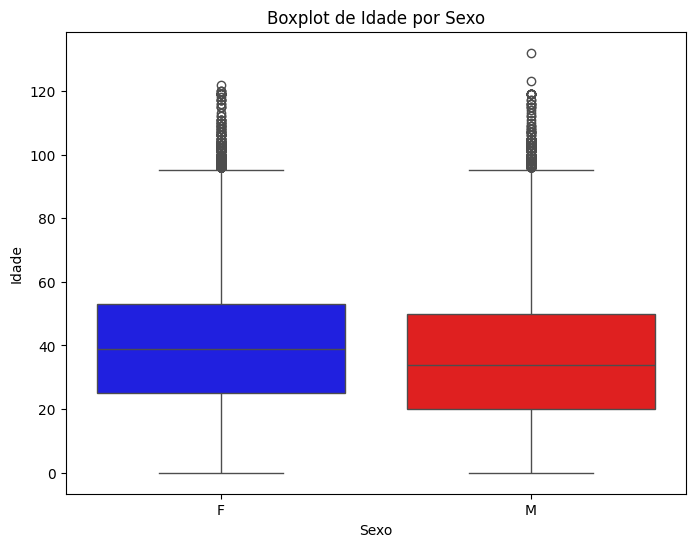

In [ ]:
# Define the colors used in the histograms (example)
colors = ['blue', 'red']  # You can adjust these colors based on your histograms

# Creating a boxplot for the two groups (Male and Female)
plt.figure(figsize=(8, 6))

# Boxplot
sns.boxplot(x="CS_SEXO", y="NU_IDADE_N", data=df_chik_age, palette=colors)

# Adding labels and title
plt.xlabel('Sexo')
plt.ylabel('Idade')
plt.title('Boxplot de Idade por Sexo')

# Show plot
plt.show()

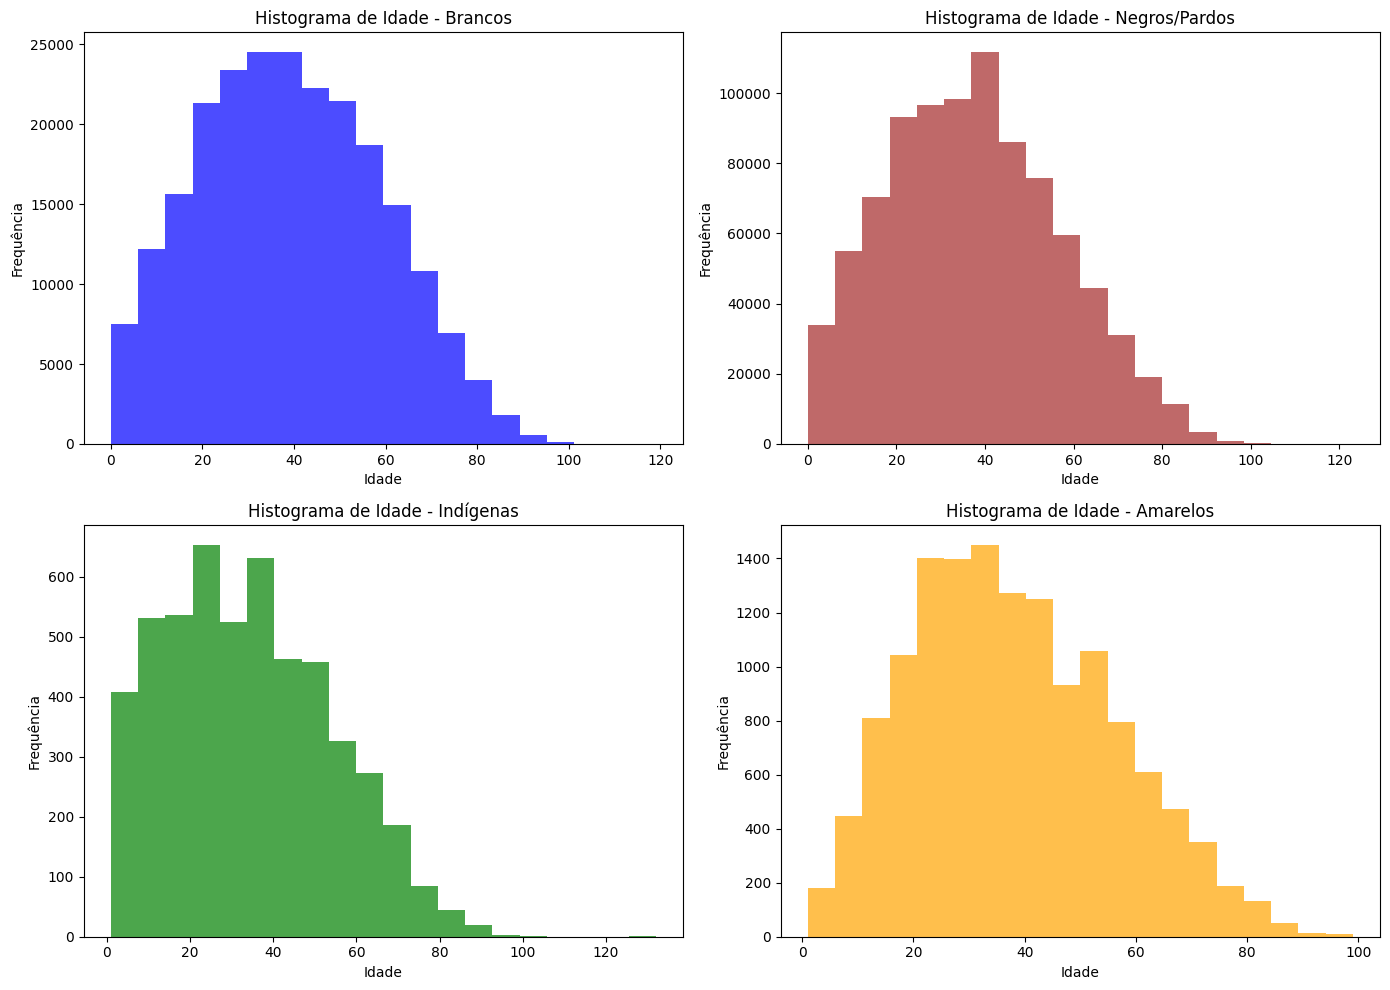

In [ ]:
# Correcting the filtering for the groups
df_brancos = df_chik_age[df_chik_age["CS_RACA"] == 1]
df_negros_pardos = df_chik_age[(df_chik_age["CS_RACA"] == 2) | (df_chik_age["CS_RACA"] == 4)]
df_indigenas = df_chik_age[df_chik_age["CS_RACA"] == 5]
df_amarelos = df_chik_age[df_chik_age["CS_RACA"] == 3]

# Creating a figure with 4 subplots (2 rows, 2 columns)
plt.figure(figsize=(14, 10))

# Histogram for brancos
plt.subplot(2, 2, 1)  # (rows, columns, position)
plt.hist(df_brancos["NU_IDADE_N"], bins=20, color='blue', alpha=0.7)
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('Histograma de Idade - Brancos')

# Histogram for negros/pardos
plt.subplot(2, 2, 2)  # (rows, columns, position)
plt.hist(df_negros_pardos["NU_IDADE_N"], bins=20, color='brown', alpha=0.7)
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('Histograma de Idade - Negros/Pardos')

# Histogram for indígenas
plt.subplot(2, 2, 3)  # (rows, columns, position)
plt.hist(df_indigenas["NU_IDADE_N"], bins=20, color='green', alpha=0.7)
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('Histograma de Idade - Indígenas')

# Histogram for amarelos
plt.subplot(2, 2, 4)  # (rows, columns, position)
plt.hist(df_amarelos["NU_IDADE_N"], bins=20, color='orange', alpha=0.7)
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('Histograma de Idade - Amarelos')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the histograms
plt.show()

<ipython-input-67-6acee597b6de>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-67-6acee597b6de>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-67-6acee597b6de>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-67-6acee59

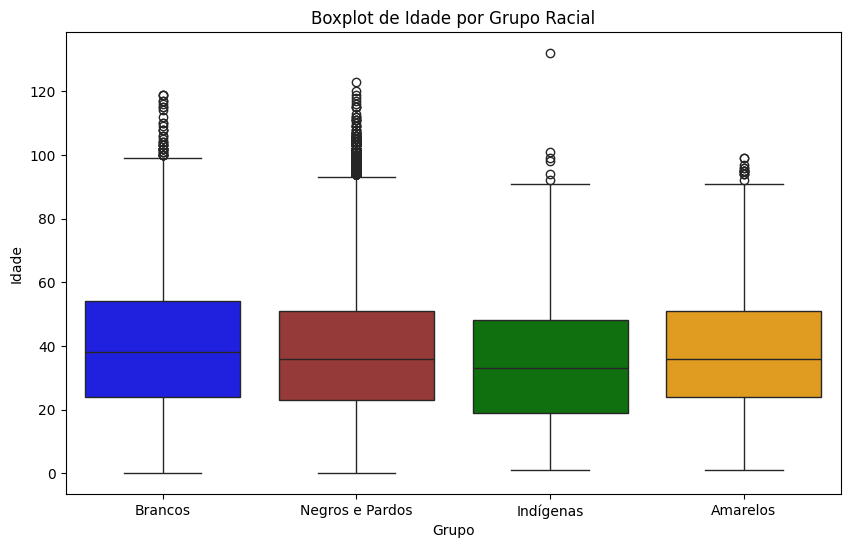

In [ ]:
# Define the colors used in the histograms (example)
colors = ['blue', 'brown', 'green', 'orange']  # You can adjust these colors based on your histograms

# Combine the data from all groups into one dataframe with a new 'Group' column
df_brancos["Group"] = "Brancos"
df_negros_pardos["Group"] = "Negros e Pardos"
df_indigenas["Group"] = "Indígenas"
df_amarelos["Group"] = "Amarelos"

# Concatenating the dataframes
df_combined = pd.concat([df_brancos, df_negros_pardos, df_indigenas, df_amarelos])

# Creating the boxplot with custom colors
plt.figure(figsize=(10, 6))
sns.boxplot(x="Group", y="NU_IDADE_N", data=df_combined, palette=colors)
plt.title("Boxplot de Idade por Grupo Racial")
plt.xlabel("Grupo")
plt.ylabel("Idade")

# Show plot
plt.show()

In [ ]:
# Convert DT_NOTIFIC to string first to ensure .str methods work
df_chik['DT_NOTIFIC'] = df_chik['DT_NOTIFIC'].astype(str)

# Now remove rows with invalid date entries (keep only rows with 8 digits)
df_chik = df_chik[df_chik['DT_NOTIFIC'].str.match(r'^\d{8}$')]

# Convert the DT_NOTIFIC column to datetime
df_chik['DT_NOTIFIC'] = pd.to_datetime(df_chik['DT_NOTIFIC'], format='%Y%m%d')

# Display the updated DataFrame
df_chik

,DT_NOTIFIC,CS_SEXO,NU_IDADE_N,SG_UF_NOT,CS_RACA
0,2015-01-01,F,4027,28,4.0
1,2015-01-01,F,4050,24,4.0
2,2015-01-01,M,4012,26,2.0
3,2015-01-01,F,4041,29,9.0
4,2015-01-01,F,4027,29,1.0
...,...,...,...,...,...
1668010,2023-03-26,M,2001,17,4
1668011,2023-03-27,F,4071,17,4
1668012,2023-03-27,M,4043,17,4
1668013,2023-03-29,M,4006,17,4


In [ ]:
# Group by DT_NOTIFIC and count the number of cases
df_cases_count = df_chik.groupby('DT_NOTIFIC').size().reset_index(name='Number of Cases')

# Calculate the 7-day and 90-day moving averages
df_cases_count['7-Day Moving Average'] = df_cases_count['Number of Cases'].rolling(window=7).mean()
df_cases_count['30-Day Moving Average'] = df_cases_count['Number of Cases'].rolling(window=30).mean()

# Display the new DataFrame
df_cases_count

,DT_NOTIFIC,Number of Cases,7-Day Moving Average,30-Day Moving Average
0,2015-01-01,16,NaN,NaN
1,2015-01-02,28,NaN,NaN
2,2015-01-03,21,NaN,NaN
3,2015-01-04,40,NaN,NaN
4,2015-01-05,70,NaN,NaN
...,...,...,...,...
3279,2023-12-26,827,494.142857,421.133333
3280,2023-12-27,861,516.714286,435.266667
3281,2023-12-28,727,528.428571,443.633333
3282,2023-12-29,585,532.142857,450.166667


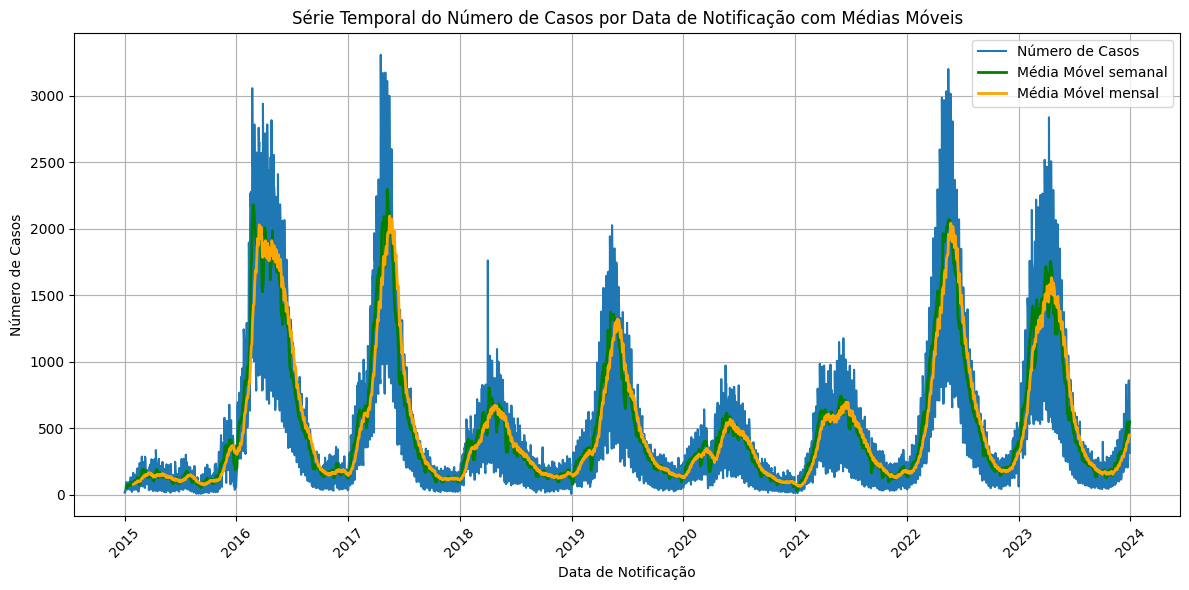

In [ ]:
# Plotting the time series
plt.figure(figsize=(12, 6))
plt.plot(df_cases_count['DT_NOTIFIC'], df_cases_count['Number of Cases'], label='Número de Casos')
plt.plot(df_cases_count['DT_NOTIFIC'], df_cases_count['7-Day Moving Average'], color='green', label='Média Móvel semanal', linewidth=2)
plt.plot(df_cases_count['DT_NOTIFIC'], df_cases_count['30-Day Moving Average'], color='orange', label='Média Móvel mensal', linewidth=2)
plt.xlabel('Data de Notificação')
plt.ylabel('Número de Casos')
plt.title('Série Temporal do Número de Casos por Data de Notificação com Médias Móveis')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
# Step 1: Create the 'YEAR' column from 'DT_NOTIFIC'
df_cases_count['YEAR'] = df_cases_count['DT_NOTIFIC'].dt.year

# Step 2: Calculate the yearly mean number of cases
media_por_ano = df_cases_count.groupby('YEAR')['Number of Cases'].mean().reset_index()

# Step 3: Create the box plot and overlay the mean line
fig = px.box(df_cases_count, x='YEAR', y='Number of Cases', color='YEAR',
             title='Box plot do Número de Casos por Ano')

# Overlay the line plot for yearly means
fig.add_scatter(x=media_por_ano['YEAR'], y=media_por_ano['Number of Cases'],
                mode='lines+markers', name='Média', line=dict(color='red'))

# Show the plot
fig.show()

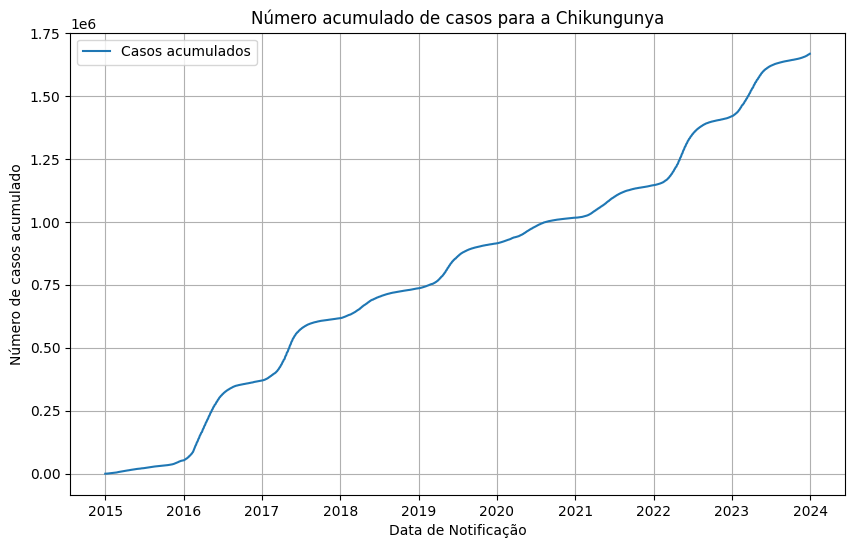

In [ ]:
# Calculate the cumulative sum of the number of cases
df_cases_count['Cumulative Cases'] = df_cases_count['Number of Cases'].cumsum()

# Plot the cumulative number of cases
plt.figure(figsize=(10,6))
plt.plot(df_cases_count['DT_NOTIFIC'], df_cases_count['Cumulative Cases'], label='Casos acumulados')
plt.title('Número acumulado de casos para a Chikungunya')
plt.xlabel('Data de Notificação')
plt.ylabel('Número de casos acumulado')
plt.legend()
plt.grid(True)
plt.show()

Extraindo as propriedades temporais da série

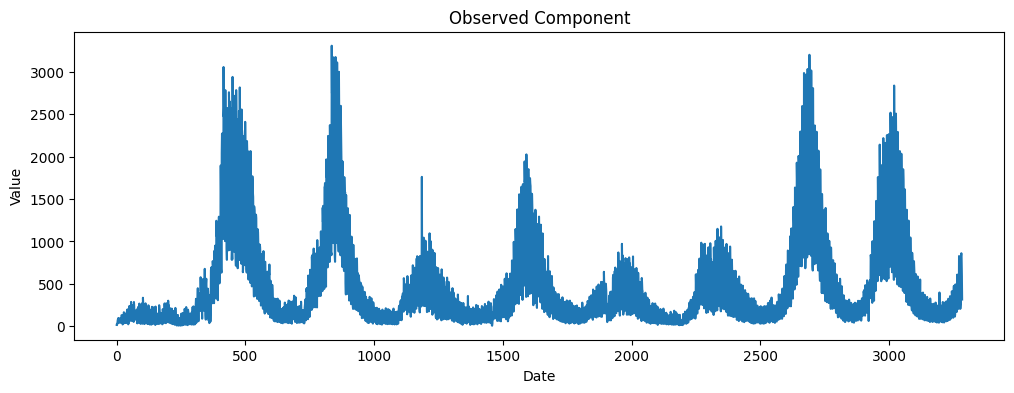

In [ ]:
# Decompose the time series with specified frequency
results_chik = seasonal_decompose(df_cases_count['Number of Cases'], period=30)  # Onde 30 indica frequência mensal

# Plot the observed component
plt.figure(figsize=(12, 4))
results_chik.observed.plot()
plt.title('Observed Component')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

<Axes: >

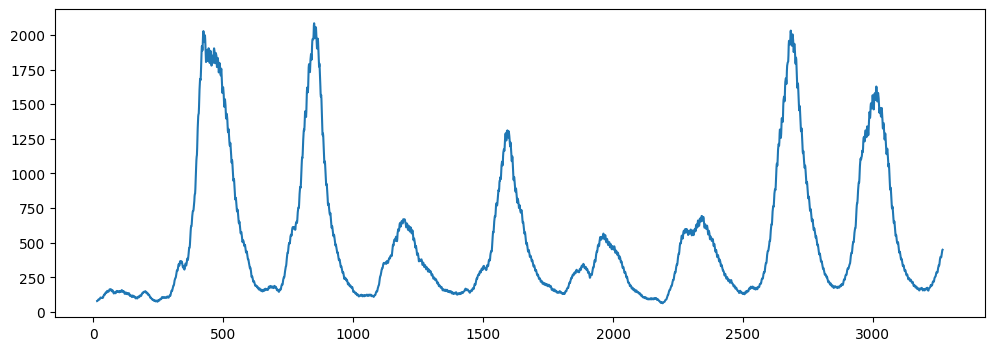

In [ ]:
# Encontrando a tendência
results_chik.trend.plot(figsize=(12,4))

<Axes: >

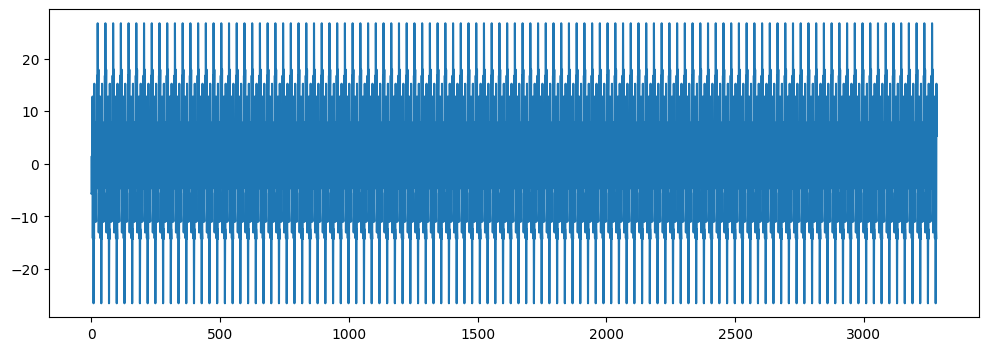

In [ ]:
# Encontrando a sazonalidade
results_chik.seasonal.plot(figsize=(12,4))

<Axes: >

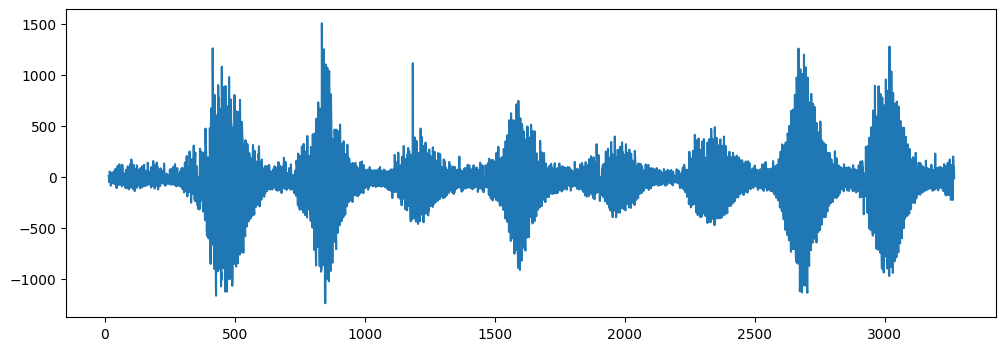

In [ ]:
# Resíduo
results_chik.resid.plot(figsize=(12,4))

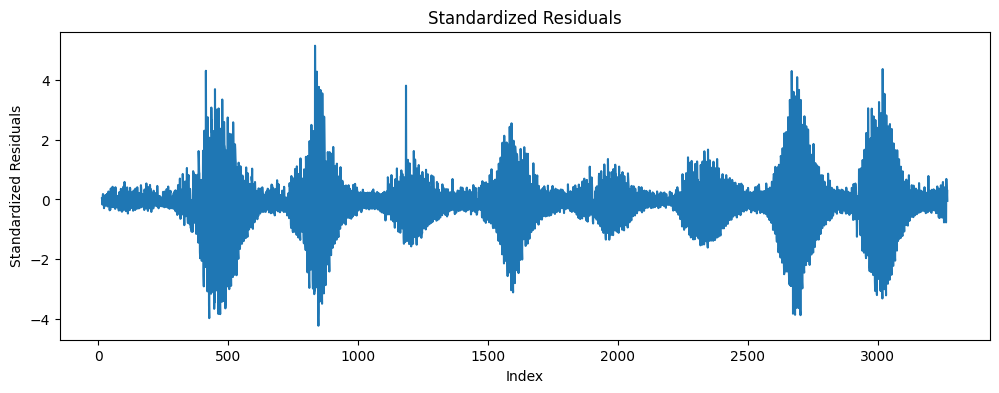

In [ ]:
# Standardizing the residuals
standardized_residuals = (results_chik.resid - results_chik.resid.mean()) / results_chik.resid.std()

# Plotting the standardized residuals
standardized_residuals.plot(figsize=(12, 4))
plt.title('Standardized Residuals')
plt.xlabel('Index')
plt.ylabel('Standardized Residuals')
plt.show()

<Axes: xlabel='resid', ylabel='Count'>

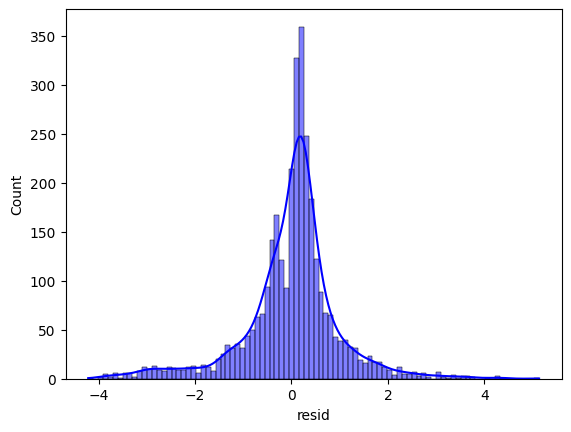

In [ ]:
sns.histplot(standardized_residuals, kde=True, color = 'blue')

Como podemos observar, a extração da tendência e da sazonalidade não são capazes de explicar totalmente o comportamento dos dados, uma vez que, embora os resíduosest estejam centrados em zero, estes seguem uma distribuição qualquer não simétrica, a visualização da dispersão dos resíduos corrobora esta afirmação, além de nos mostrar um comportamento misto e não homocedástico.

In [ ]:
results_chik.resid

,resid
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3279,NaN
3280,NaN
3281,NaN
3282,NaN


In [ ]:
results_chik.resid.isna().sum()

30

In [ ]:
results_chik.resid.dropna(inplace = True)

(array([-100,  -99,  -98,  -97,  -96,  -95,  -94,  -93,  -92,  -91,  -90,
         -89,  -88,  -87,  -86,  -85,  -84,  -83,  -82,  -81,  -80,  -79,
         -78,  -77,  -76,  -75,  -74,  -73,  -72,  -71,  -70,  -69,  -68,
         -67,  -66,  -65,  -64,  -63,  -62,  -61,  -60,  -59,  -58,  -57,
         -56,  -55,  -54,  -53,  -52,  -51,  -50,  -49,  -48,  -47,  -46,
         -45,  -44,  -43,  -42,  -41,  -40,  -39,  -38,  -37,  -36,  -35,
         -34,  -33,  -32,  -31,  -30,  -29,  -28,  -27,  -26,  -25,  -24,
         -23,  -22,  -21,  -20,  -19,  -18,  -17,  -16,  -15,  -14,  -13,
         -12,  -11,  -10,   -9,   -8,   -7,   -6,   -5,   -4,   -3,   -2,
          -1,    0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
          10,   11,   12,   13,   14,   15,   16,   17,   18,   19,   20,
          21,   22,   23,   24,   25,   26,   27,   28,   29,   30,   31,
          32,   33,   34,   35,   36,   37,   38,   39,   40,   41,   42,
          43,   44,   45,   46,   47, 

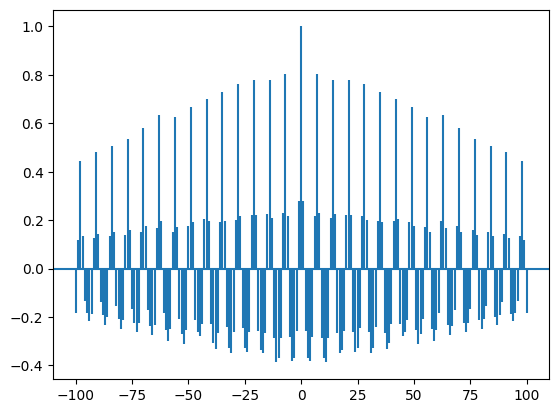

In [ ]:
plt.acorr(results_chik.resid.values, maxlags = 100)

É possível observar comportamento semelhante ao que ocorre com o Zika vírus, com moderada autocorrelação entre uma determinada observação e as 30 que a antecedem e sucedem, tendendo ao enfraquecimento com o passar do tempo, indicando a existência de padrões de comportamento sazonal, mas que não se perpetuam.



# **Dengue**

In [ ]:
with open('deng1_novo.csv', 'r') as file:
    lines = file.readlines()

cleaned_lines = []
for line in lines:
    if line.count('"') % 2 != 0:  # Check for unclosed quotes
        line = line.rstrip() + '"'  # Add closing quote
    cleaned_lines.append(line)

with open('cleaned_deng1.csv', 'w') as file:
    file.writelines(cleaned_lines)

df_deng1 = pd.read_csv('cleaned_deng1.csv')
df_deng1

<ipython-input-22-af155d2e37b2>:13: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_deng1 = pd.read_csv('cleaned_deng1.csv')


,CS_SEXO,CS_RACA,DT_NOTIFIC,SG_UF_NOT,NU_IDADE_N
0,F,4.0,20070212,21.0,4032.0
1,F,4.0,20070212,21.0,4017.0
2,M,1.0,20070226,26.0,4033.0
3,F,1.0,20070212,29.0,3004.0
4,M,4.0,20070207,29.0,4009.0
...,...,...,...,...,...
22083661,F,4,20231229,17.0,4039.0
22083662,F,2,20231229,17.0,4052.0
22083663,F,4,20231229,17.0,4027.0
22083664,M,1,20231229,17.0,4064.0


In [ ]:
df_deng1["NU_IDADE_N"] = pd.to_numeric(df_deng1["NU_IDADE_N"], errors='coerce')

df_deng1["NU_IDADE_N"] = df_deng1["NU_IDADE_N"].apply(lambda x: x - 4000 if x >= 4000 else x)

df_deng1

,CS_SEXO,CS_RACA,DT_NOTIFIC,SG_UF_NOT,NU_IDADE_N
0,F,4.0,20070212,21.0,32.0
1,F,4.0,20070212,21.0,17.0
2,M,1.0,20070226,26.0,33.0
3,F,1.0,20070212,29.0,3004.0
4,M,4.0,20070207,29.0,9.0
...,...,...,...,...,...
22083661,F,4,20231229,17.0,39.0
22083662,F,2,20231229,17.0,52.0
22083663,F,4,20231229,17.0,27.0
22083664,M,1,20231229,17.0,64.0


In [ ]:
with open('deng2.csv', 'r') as file:
    lines = file.readlines()

cleaned_lines = []
for line in lines:
    if line.count('"') % 2 != 0:  # Check for unclosed quotes
        line = line.rstrip() + '"'  # Add closing quote
    cleaned_lines.append(line)

with open('cleaned_deng2.csv', 'w') as file:
    file.writelines(cleaned_lines)

df_deng2 = pd.read_csv('cleaned_deng2.csv')

# Rename the column NU_IDADE to NU_IDADE_N
df_deng2 = df_deng2.rename(columns={'NU_IDADE': 'NU_IDADE_N'})

df_deng2

,CS_SEXO,CS_RACA,DT_NOTIFIC,SG_UF_NOT,NU_IDADE_N
0,M,NaN,20001209,AC,A046
1,M,NaN,20000414,AC,A023
2,M,NaN,20000410,AC,A020
3,F,NaN,20000921,AC,A030
4,F,NaN,20001204,AC,A008
...,...,...,...,...,...
2784532,F,4.0,20061010,TO,A008
2784533,F,4.0,20061010,TO,A031
2784534,F,2.0,20061204,TO,A011
2784535,F,1.0,20061227,TO,D001


In [ ]:
# Concatenando as bases
df_deng = pd.concat([df_deng2, df_deng1], ignore_index=True)

# Display the concatenated DataFrame
df_deng

,CS_SEXO,CS_RACA,DT_NOTIFIC,SG_UF_NOT,NU_IDADE_N
0,M,NaN,20001209,AC,A046
1,M,NaN,20000414,AC,A023
2,M,NaN,20000410,AC,A020
3,F,NaN,20000921,AC,A030
4,F,NaN,20001204,AC,A008
...,...,...,...,...,...
24868198,F,4,20231229,17.0,39.0
24868199,F,2,20231229,17.0,52.0
24868200,F,4,20231229,17.0,27.0
24868201,M,1,20231229,17.0,64.0


In [ ]:
# Definindo nosso dataset
df_deng_age = df_deng

# Ensure the NU_IDADE_N column is of string type
df_deng_age['NU_IDADE_N'] = df_deng_age['NU_IDADE_N'].astype(str)

# Function to process ages
def process_age(value):
    # Remove any leading or trailing whitespace
    value = value.strip()

    # Check if the value is formatted like 'B042' or similar
    if value.startswith(('B', 'A', 'C')) and len(value) > 2:
        return int(value[-2:])  # Extract last two digits and convert to int
    else:
        # Handle numeric values and convert to int
        try:
            return int(float(value))  # Convert string float to int
        except ValueError:
            return None  # Return None for any non-convertible values

# Apply the function to the column
df_deng_age['NU_IDADE_N'] = df_deng_age['NU_IDADE_N'].apply(process_age)

# Optionally, drop rows with NaN values (if needed)
df_deng_age = df_deng_age.dropna(subset=['NU_IDADE_N'])

# Display the updated DataFrame
df_deng_age

,CS_SEXO,CS_RACA,DT_NOTIFIC,SG_UF_NOT,NU_IDADE_N
0,M,NaN,20001209,AC,46.0
1,M,NaN,20000414,AC,23.0
2,M,NaN,20000410,AC,20.0
3,F,NaN,20000921,AC,30.0
4,F,NaN,20001204,AC,8.0
...,...,...,...,...,...
24868198,F,4,20231229,17.0,39.0
24868199,F,2,20231229,17.0,52.0
24868200,F,4,20231229,17.0,27.0
24868201,M,1,20231229,17.0,64.0


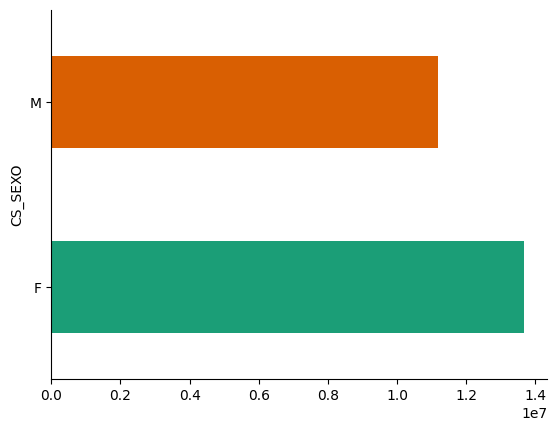

In [ ]:
df_deng_sexo = df_deng[(df_deng['CS_SEXO'] == 'M') | (df_deng['CS_SEXO'] == 'F')]

df_deng_sexo.groupby('CS_SEXO').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

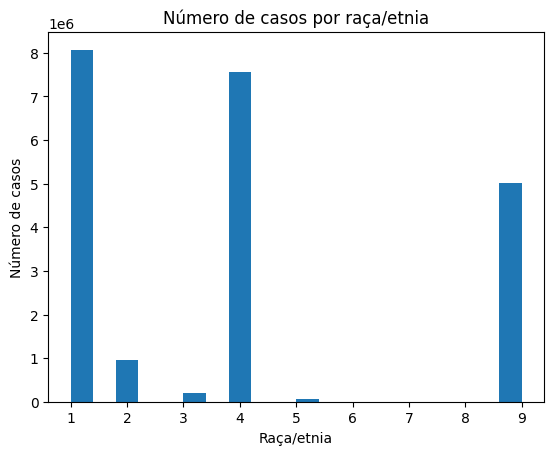

In [ ]:
# Convert 'CS_RACA' to numeric (forcing any non-numeric values to NaN), then drop NaN
df_deng_raca = pd.to_numeric(df_deng['CS_RACA'], errors='coerce').dropna()

# Now plot the histogram
df_deng_raca.plot(kind='hist', bins=20, title='Número de casos por raça/etnia')
plt.xlabel('Raça/etnia')
plt.ylabel('Número de casos')
plt.show()

In [ ]:
df_deng_age.describe()

,NU_IDADE_N
count,2.476136e+07
mean,7.009691e+01
std,3.145317e+02
min,0.000000e+00
25%,1.900000e+01
50%,3.100000e+01
75%,4.600000e+01
max,9.595000e+03


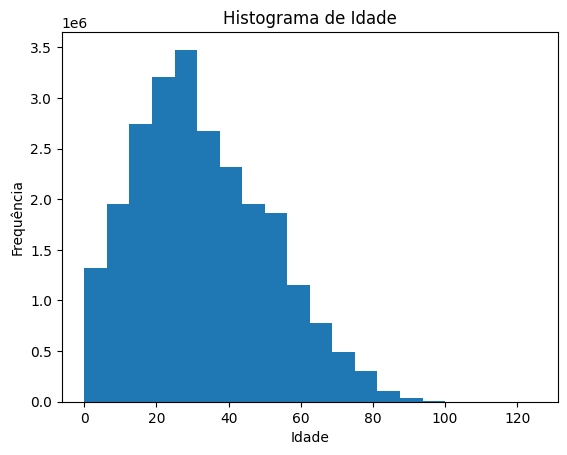

In [ ]:
df_deng_age = df_deng_age[(df_deng_age['CS_SEXO'] == 'M') | (df_deng_age['CS_SEXO'] == 'F')]
df_deng_age = df_deng_age[df_deng_age['NU_IDADE_N'] <= 125]

plt.hist(df_deng_age["NU_IDADE_N"], bins = 20)
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('Histograma de Idade')
plt.show()

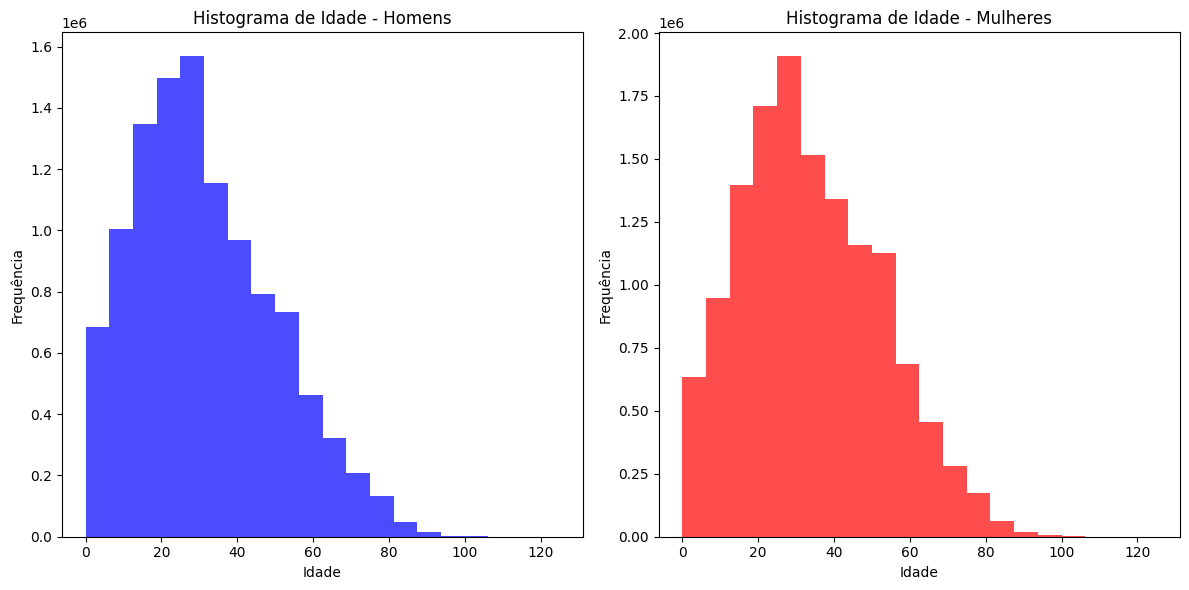

In [ ]:
# Filtering the dataset for males and females
df_male = df_deng_age[df_deng_age["CS_SEXO"] == "M"]
df_female = df_deng_age[df_deng_age["CS_SEXO"] == "F"]

# Creating the figure and two subplots side by side
plt.figure(figsize=(12, 6))

# First subplot for males
plt.subplot(1, 2, 1)  # (rows, columns, position)
plt.hist(df_male["NU_IDADE_N"], bins=20, color='blue', alpha=0.7)
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('Histograma de Idade - Homens')

# Second subplot for females
plt.subplot(1, 2, 2)  # (rows, columns, position)
plt.hist(df_female["NU_IDADE_N"], bins=20, color='red', alpha=0.7)
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('Histograma de Idade - Mulheres')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the histograms
plt.show()

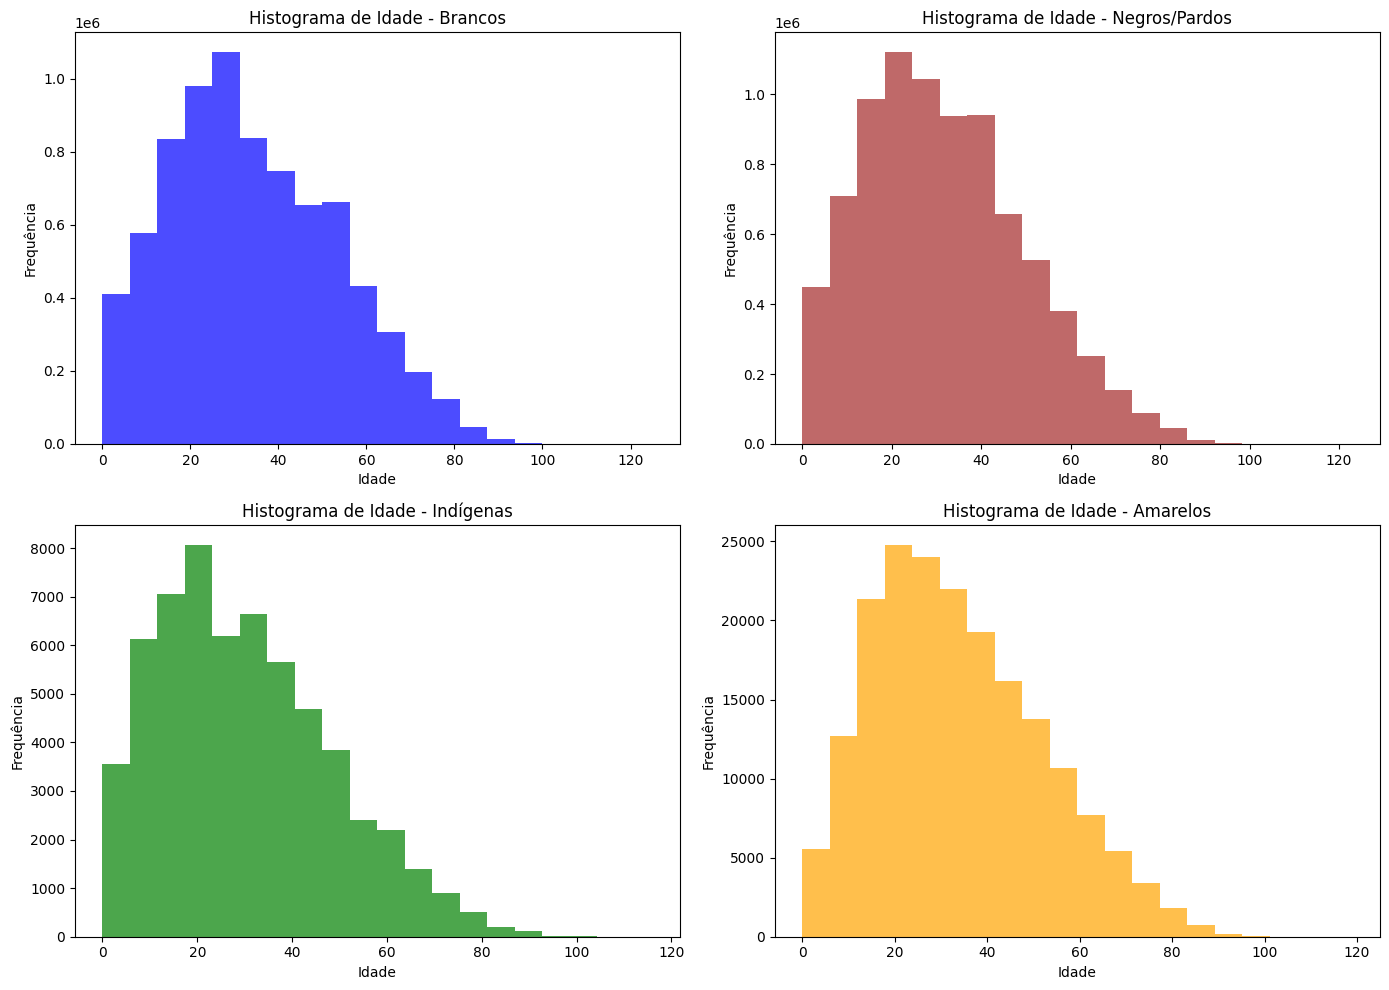

In [ ]:
# Correcting the filtering for the groups
df_brancos = df_deng_age[df_deng_age["CS_RACA"] == 1]
df_negros_pardos = df_deng_age[(df_deng_age["CS_RACA"] == 2) | (df_deng_age["CS_RACA"] == 4)]
df_indigenas = df_deng_age[df_deng_age["CS_RACA"] == 5]
df_amarelos = df_deng_age[df_deng_age["CS_RACA"] == 3]

# Creating a figure with 4 subplots (2 rows, 2 columns)
plt.figure(figsize=(14, 10))

# Histogram for brancos
plt.subplot(2, 2, 1)  # (rows, columns, position)
plt.hist(df_brancos["NU_IDADE_N"], bins=20, color='blue', alpha=0.7)
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('Histograma de Idade - Brancos')

# Histogram for negros/pardos
plt.subplot(2, 2, 2)  # (rows, columns, position)
plt.hist(df_negros_pardos["NU_IDADE_N"], bins=20, color='brown', alpha=0.7)
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('Histograma de Idade - Negros/Pardos')

# Histogram for indígenas
plt.subplot(2, 2, 3)  # (rows, columns, position)
plt.hist(df_indigenas["NU_IDADE_N"], bins=20, color='green', alpha=0.7)
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('Histograma de Idade - Indígenas')

# Histogram for amarelos
plt.subplot(2, 2, 4)  # (rows, columns, position)
plt.hist(df_amarelos["NU_IDADE_N"], bins=20, color='orange', alpha=0.7)
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('Histograma de Idade - Amarelos')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the histograms
plt.show()

<ipython-input-9-6acee597b6de>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_brancos["Group"] = "Brancos"
<ipython-input-9-6acee597b6de>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_negros_pardos["Group"] = "Negros e Pardos"
<ipython-input-9-6acee597b6de>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

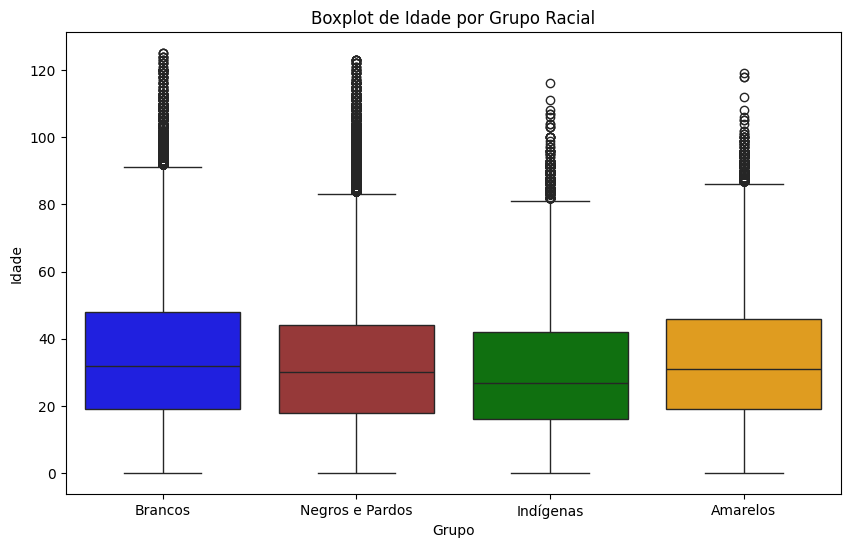

In [ ]:
# Define the colors used in the histograms (example)
colors = ['blue', 'brown', 'green', 'orange']  # You can adjust these colors based on your histograms

# Combine the data from all groups into one dataframe with a new 'Group' column
df_brancos["Group"] = "Brancos"
df_negros_pardos["Group"] = "Negros e Pardos"
df_indigenas["Group"] = "Indígenas"
df_amarelos["Group"] = "Amarelos"

# Concatenating the dataframes
df_combined = pd.concat([df_brancos, df_negros_pardos, df_indigenas, df_amarelos])

# Creating the boxplot with custom colors
plt.figure(figsize=(10, 6))
sns.boxplot(x="Group", y="NU_IDADE_N", data=df_combined, palette=colors)
plt.title("Boxplot de Idade por Grupo Racial")
plt.xlabel("Grupo")
plt.ylabel("Idade")

# Show plot
plt.show()

In [ ]:
# Convert DT_NOTIFIC to string first to ensure .str methods work
df_deng['DT_NOTIFIC'] = df_deng['DT_NOTIFIC'].astype(str)

# Now remove rows with invalid date entries (keep only rows with 8 digits)
df_deng = df_deng[df_deng['DT_NOTIFIC'].str.match(r'^\d{8}$')]

# Convert the DT_NOTIFIC column to datetime
df_deng['DT_NOTIFIC'] = pd.to_datetime(df_deng['DT_NOTIFIC'], format='%Y%m%d')

# Display the updated DataFrame
df_deng

<ipython-input-26-957726c2ffaf>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_deng['DT_NOTIFIC'] = pd.to_datetime(df_deng['DT_NOTIFIC'], format='%Y%m%d')


,CS_SEXO,CS_RACA,DT_NOTIFIC,SG_UF_NOT,NU_IDADE_N
0,M,NaN,2000-12-09,AC,A046
1,M,NaN,2000-04-14,AC,A023
2,M,NaN,2000-04-10,AC,A020
3,F,NaN,2000-09-21,AC,A030
4,F,NaN,2000-12-04,AC,A008
...,...,...,...,...,...
24868198,F,4,2023-12-29,17.0,39.0
24868199,F,2,2023-12-29,17.0,52.0
24868200,F,4,2023-12-29,17.0,27.0
24868201,M,1,2023-12-29,17.0,64.0


In [ ]:
# Group by DT_NOTIFIC and count the number of cases
df_cases_count = df_deng.groupby('DT_NOTIFIC').size().reset_index(name='Number of Cases')

# Calculate the 7-day and 90-day moving averages
df_cases_count['7-Day Moving Average'] = df_cases_count['Number of Cases'].rolling(window=7).mean()
df_cases_count['30-Day Moving Average'] = df_cases_count['Number of Cases'].rolling(window=30).mean()

# Display the new DataFrame
df_cases_count

,DT_NOTIFIC,Number of Cases,7-Day Moving Average,30-Day Moving Average
0,2000-01-01,13,NaN,NaN
1,2000-01-02,97,NaN,NaN
2,2000-01-03,341,NaN,NaN
3,2000-01-04,386,NaN,NaN
4,2000-01-05,422,NaN,NaN
...,...,...,...,...
8759,2023-12-26,5407,2992.571429,2521.200000
8760,2023-12-27,5104,3193.285714,2606.500000
8761,2023-12-28,4885,3372.142857,2692.566667
8762,2023-12-29,4432,3527.428571,2770.300000


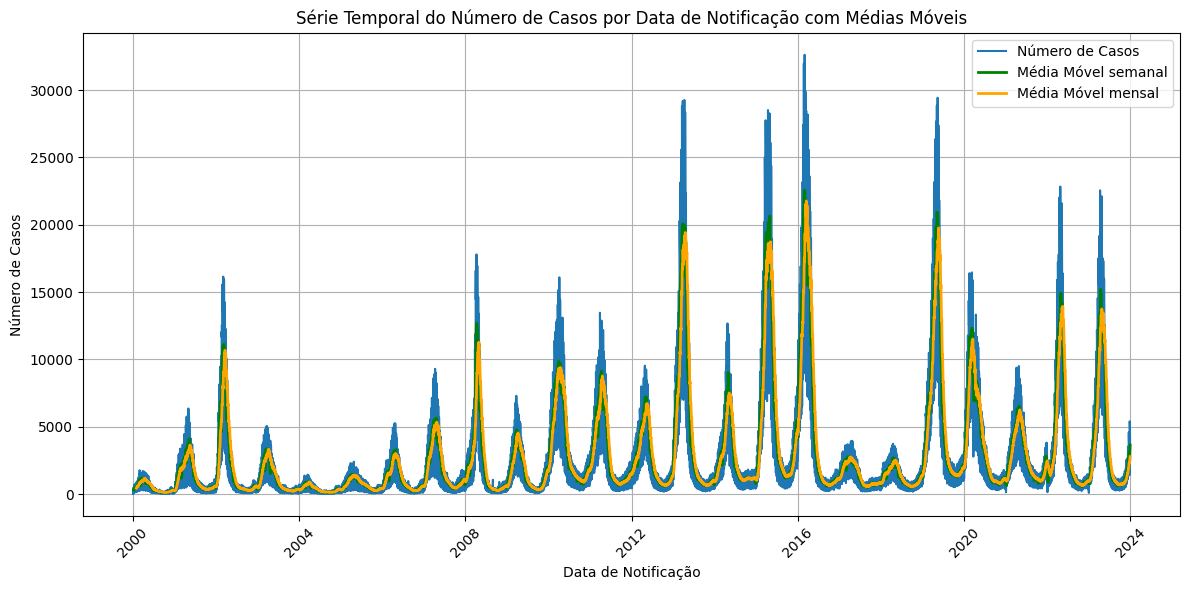

In [ ]:
# Plotting the time series
plt.figure(figsize=(12, 6))
plt.plot(df_cases_count['DT_NOTIFIC'], df_cases_count['Number of Cases'], label='Número de Casos')
plt.plot(df_cases_count['DT_NOTIFIC'], df_cases_count['7-Day Moving Average'], color='green', label='Média Móvel semanal', linewidth=2)
plt.plot(df_cases_count['DT_NOTIFIC'], df_cases_count['30-Day Moving Average'], color='orange', label='Média Móvel mensal', linewidth=2)
plt.xlabel('Data de Notificação')
plt.ylabel('Número de Casos')
plt.title('Série Temporal do Número de Casos por Data de Notificação com Médias Móveis')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
# Step 1: Create the 'YEAR' column from 'DT_NOTIFIC'
df_cases_count['YEAR'] = df_cases_count['DT_NOTIFIC'].dt.year

# Step 2: Calculate the yearly mean number of cases
media_por_ano = df_cases_count.groupby('YEAR')['Number of Cases'].mean().reset_index()

# Step 3: Create the box plot and overlay the mean line
fig = px.box(df_cases_count, x='YEAR', y='Number of Cases', color='YEAR',
             title='Box plot do Número de Casos por Ano')

# Overlay the line plot for yearly means
fig.add_scatter(x=media_por_ano['YEAR'], y=media_por_ano['Number of Cases'],
                mode='lines+markers', name='Média', line=dict(color='red'))

# Show the plot
fig.show()

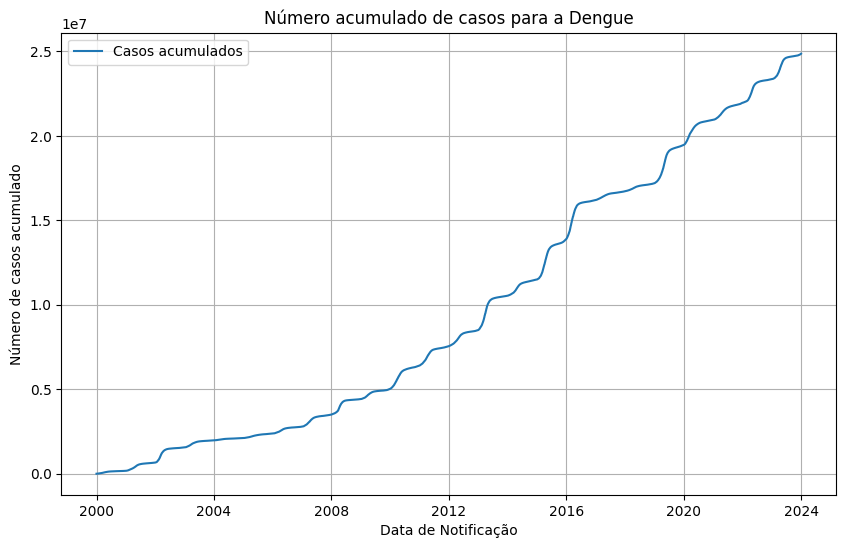

In [ ]:
# Calculate the cumulative sum of the number of cases
df_cases_count['Cumulative Cases'] = df_cases_count['Number of Cases'].cumsum()

# Plot the cumulative number of cases
plt.figure(figsize=(10,6))
plt.plot(df_cases_count['DT_NOTIFIC'], df_cases_count['Cumulative Cases'], label='Casos acumulados')
plt.title('Número acumulado de casos para a Dengue')
plt.xlabel('Data de Notificação')
plt.ylabel('Número de casos acumulado')
plt.legend()
plt.grid(True)
plt.show()

Extraindo as propriedades temporais da série

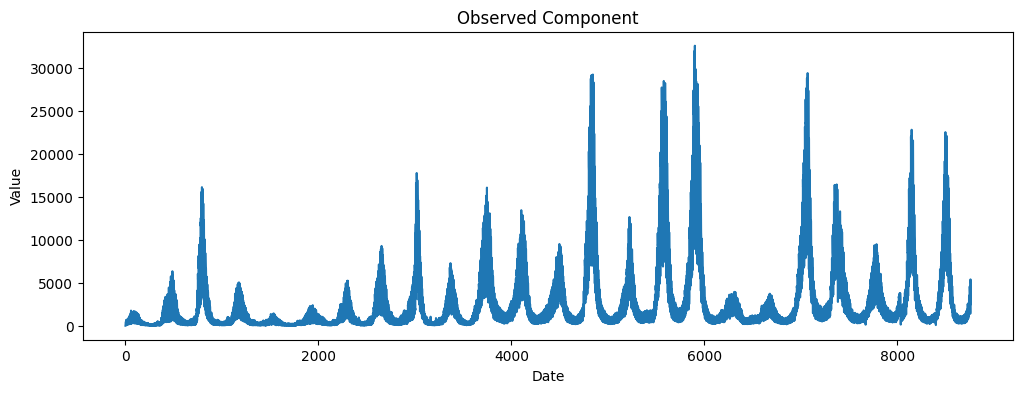

In [ ]:
# Decompose the time series with specified frequency
results_deng = seasonal_decompose(df_cases_count['Number of Cases'], period=30)  # Onde 30 indica frequência mensal

# Plot the observed component
plt.figure(figsize=(12, 4))
results_deng.observed.plot()
plt.title('Observed Component')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

<Axes: >

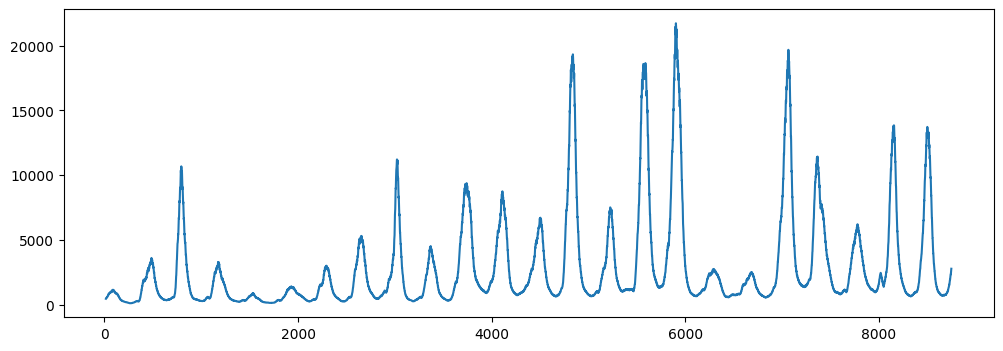

In [ ]:
# Encontrando a tendência
results_deng.trend.plot(figsize=(12,4))

<Axes: >

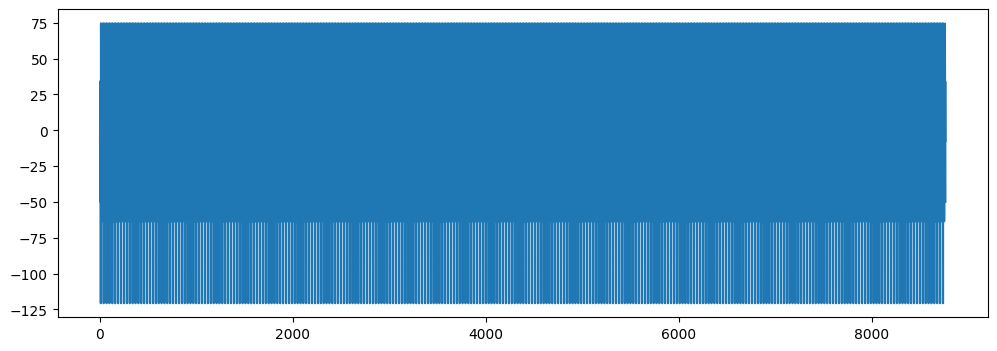

In [ ]:
# Encontrando a sazonalidade
results_deng.seasonal.plot(figsize=(12,4))

<Axes: >

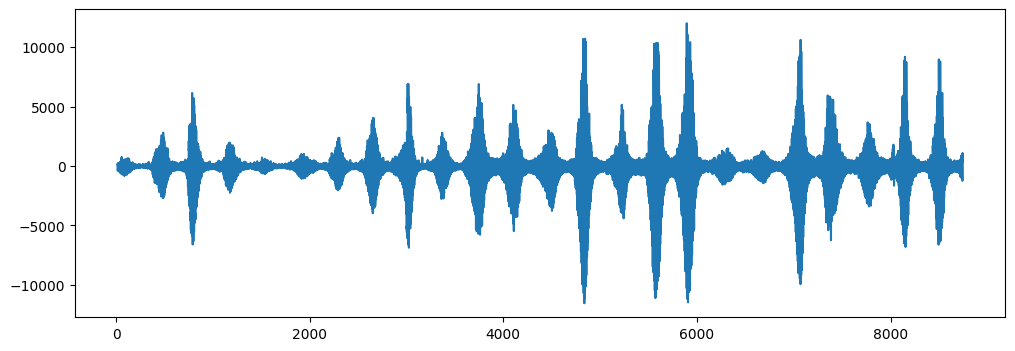

In [ ]:
# Resíduo
results_deng.resid.plot(figsize=(12,4))

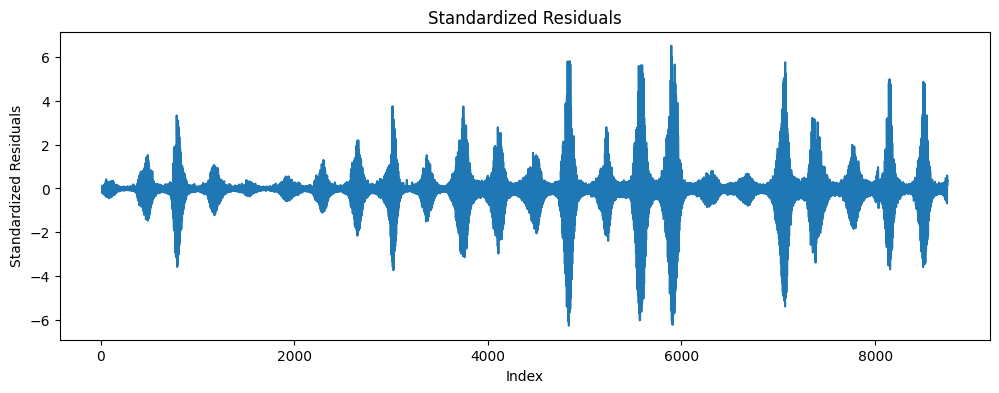

In [ ]:
# Standardizing the residuals
standardized_residuals = (results_deng.resid - results_deng.resid.mean()) / results_deng.resid.std()

# Plotting the standardized residuals
standardized_residuals.plot(figsize=(12, 4))
plt.title('Standardized Residuals')
plt.xlabel('Index')
plt.ylabel('Standardized Residuals')
plt.show()

<Axes: xlabel='resid', ylabel='Count'>

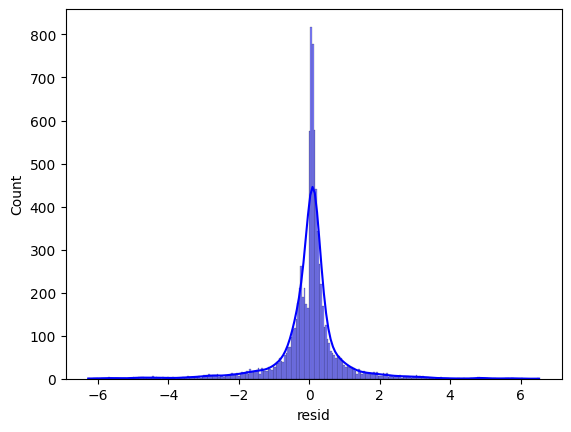

In [ ]:
sns.histplot(standardized_residuals, kde=True, color = 'blue')

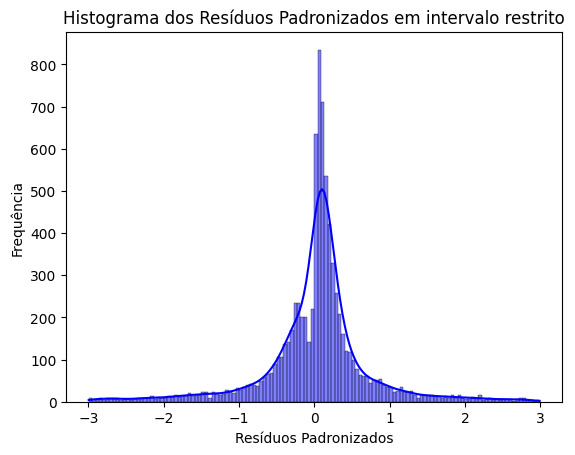

In [ ]:
# Filter standardized residuals to be between -3 and 3
filtered_residuals = standardized_residuals[(standardized_residuals >= -3) & (standardized_residuals <= 3)]

# Plot the histogram with KDE (Kernel Density Estimate)
sns.histplot(filtered_residuals, kde=True, color='blue')
plt.title('Histograma dos Resíduos Padronizados em intervalo restrito')
plt.xlabel('Resíduos Padronizados')
plt.ylabel('Frequência')
plt.show()

É possível observar com base no histograma e no diagrama de dispersão dos resíduos, que estes, embora centrados em zero não possuem uma distribuição normal, não apresentam homocedasticidade e apresentam comportamentos mistos, o que indica que apenas a tendência e a sazonalidade não são capazes de explicar a variabilidade dos dados temporais.

In [ ]:
results_deng.resid

,resid
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
8759,NaN
8760,NaN
8761,NaN
8762,NaN


In [ ]:
results_deng.resid.isna().sum()

30

In [ ]:
results_deng.resid.dropna(inplace = True)

(array([-100,  -99,  -98,  -97,  -96,  -95,  -94,  -93,  -92,  -91,  -90,
         -89,  -88,  -87,  -86,  -85,  -84,  -83,  -82,  -81,  -80,  -79,
         -78,  -77,  -76,  -75,  -74,  -73,  -72,  -71,  -70,  -69,  -68,
         -67,  -66,  -65,  -64,  -63,  -62,  -61,  -60,  -59,  -58,  -57,
         -56,  -55,  -54,  -53,  -52,  -51,  -50,  -49,  -48,  -47,  -46,
         -45,  -44,  -43,  -42,  -41,  -40,  -39,  -38,  -37,  -36,  -35,
         -34,  -33,  -32,  -31,  -30,  -29,  -28,  -27,  -26,  -25,  -24,
         -23,  -22,  -21,  -20,  -19,  -18,  -17,  -16,  -15,  -14,  -13,
         -12,  -11,  -10,   -9,   -8,   -7,   -6,   -5,   -4,   -3,   -2,
          -1,    0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
          10,   11,   12,   13,   14,   15,   16,   17,   18,   19,   20,
          21,   22,   23,   24,   25,   26,   27,   28,   29,   30,   31,
          32,   33,   34,   35,   36,   37,   38,   39,   40,   41,   42,
          43,   44,   45,   46,   47, 

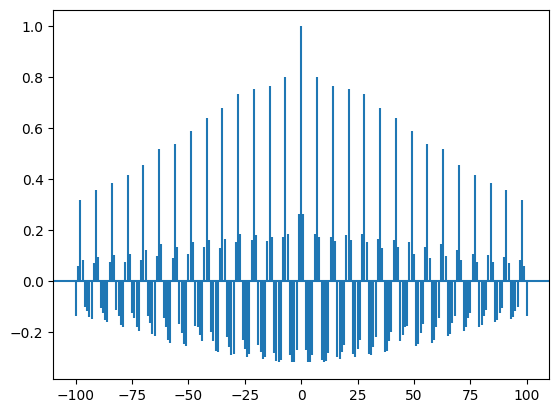

In [ ]:
plt.acorr(results_deng.resid.values, maxlags = 100)

O diagrama de autocorrelação nos permite concluir a existência de  correlações sazonais moderadas que tendem a enfraquecer com o tempo.